### IDs:
Insert yours IDs to the cell below

ID #1: 324369412

ID #2: 316420132


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

`Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below).
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
import scipy.stats as stats

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

 Index     x             y
     1   1.0      1.248357
     2   2.0      1.930868
     3   3.0      3.323844
     4   4.0      4.761515
     5   5.0      4.882923
     6   6.0      5.882932
     7   7.0      7.789606
     8   8.0      8.383717
     9   9.0      8.765263
    10  10.0     10.271280
    11  11.0     10.768291
    12  12.0     11.767135
    13  13.0     13.120981
    14  14.0     13.043360
    15  15.0     14.137541
    16  16.0     15.718856
    17  17.0     16.493584
    18  18.0     18.157124
    19  19.0     18.545988
    20  20.0     19.293848
    21  21.0     21.732824
    22  22.0     21.887112
    23  23.0     23.033764
    24  24.0     23.287626
    25  25.0     24.727809
    26  26.0     26.055461
    27  27.0     26.424503
    28  28.0     28.187849
    29  29.0     28.699681
    30  30.0     29.854153
    31  31.0     30.699147
    32  32.0     32.926139
    33  33.0     32.993251
    34  34.0     33.471145
    35  35.0     35.411272
    36  36.0     35.389578
 

<Figure size 600x600 with 0 Axes>

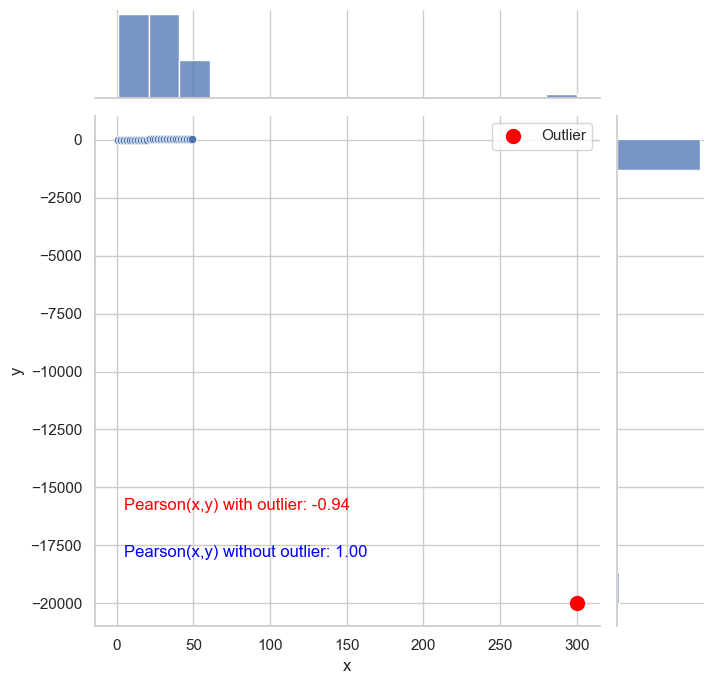

In [40]:
# Generate 49 points following a strong positive correlation
np.random.seed(42)
x_values = np.linspace(1, 49, 49)
y_values = x_values + np.random.normal(scale=0.5, size=49)  # Small noise

# Introduce an extreme outlier at index 50
x_outlier = 300  # Move outlier further right
y_outlier = -20000  # Make outlier more extreme

# Combine data
x_full = np.append(x_values, x_outlier)
y_full = np.append(y_values, y_outlier)

# Create DataFrame
df_full = pd.DataFrame({"Index": np.arange(1, 51), "x": x_full, "y": y_full})

# Compute Pearson correlations
pearson_full = pearsonr(x_full, y_full)[0]  # Pearson correlation with outlier
pearson_no_outlier = pearsonr(x_values, y_values)[0]  # Pearson correlation without outlier

# Print table
print(df_full.to_string(index=False))

# Plot jointplot
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
g = sns.jointplot(data=df_full, x="x", y="y", kind="scatter", height=7, marginal_kws={'bins': 15})

# Annotate with Pearson correlations
g.ax_joint.text(5, -16000, f"Pearson(x,y) with outlier: {pearson_full:.2f}", fontsize=12, color="red")
g.ax_joint.text(5, -18000, f"Pearson(x,y) without outlier: {pearson_no_outlier:.2f}", fontsize=12, color="blue")

# Highlight outlier
g.ax_joint.scatter(x_outlier, y_outlier, color='red', s=100, label="Outlier")
g.ax_joint.legend()

plt.show()

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

In [41]:
print("It is impossible to achieve Spearman's correlation of 1 by adding a single point because Spearman's correlation depends on the overall ranking order, not just individual values. If the rankings of the first n-1 points are disordered, adding one more point cannot fully correct them. A perfect Spearman correlation requires all ranks to follow a strict monotonic order, which a single addition cannot enforce. Therefore, fixing the ranking requires modifying multiple points, not just one.")

It is impossible to achieve Spearman's correlation of 1 by adding a single point because Spearman's correlation depends on the overall ranking order, not just individual values. If the rankings of the first n-1 points are disordered, adding one more point cannot fully correct them. A perfect Spearman correlation requires all ranks to follow a strict monotonic order, which a single addition cannot enforce. Therefore, fixing the ranking requires modifying multiple points, not just one.


#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

Adjusted Spearman's rank correlation (rho): -0.4981992797118847
Adjusted Kendall's tau correlation: -0.018775510204081632
Kendall - Spearman: 0.4794237695078031


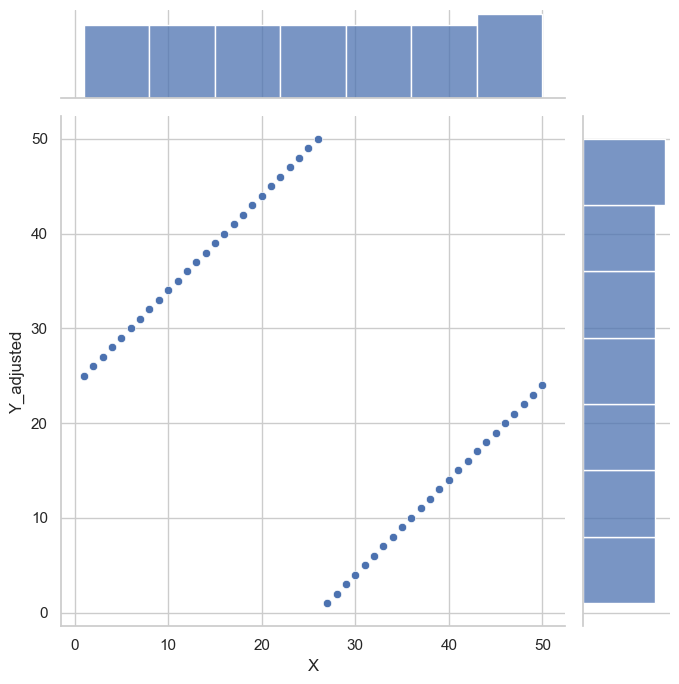

In [42]:
# Original data
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

# Adjusted data to increase Spearman's correlation
# Making Y more closely aligned to X while preserving the relative order
Y_adjusted = [25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# Spearman's rank correlation
spearman_adjusted, _ = spearmanr(X, Y_adjusted)

# Kendall's tau correlation
kendall_adjusted, _ = kendalltau(X, Y_adjusted)

# Display results
print("Adjusted Spearman's rank correlation (rho):", spearman_adjusted)
print("Adjusted Kendall's tau correlation:", kendall_adjusted)
print(f"Kendall - Spearman: {kendall_adjusted - spearman_adjusted}")

# Create DataFrame for extended data
df_adjusted_extended = pd.DataFrame({"X": X, "Y_adjusted": Y_adjusted})

# Plot jointplot for extended data
sns.set(style="whitegrid")
sns.jointplot(data=df_adjusted_extended, x="X", y="Y_adjusted", kind="scatter", height=7)

plt.show()

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

Adjusted Spearman's rank correlation (rho): 0.4981992797118847
Adjusted Kendall's tau correlation: 0.018775510204081632
Kendall - Spearman: -0.4794237695078031


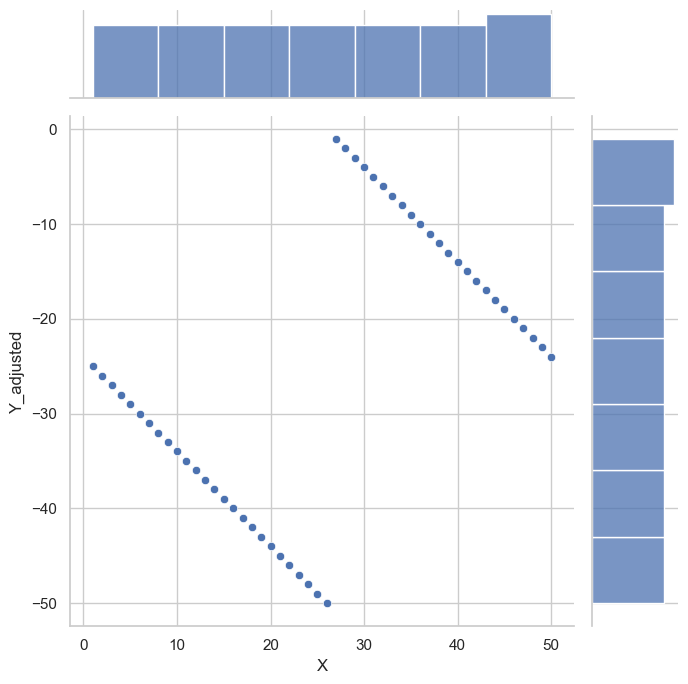

In [43]:
# Original data
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

# Adjusted data to increase Spearman's correlation
# Making Y more closely aligned to X while preserving the relative order
Y_adjusted = [-25,-26,-27,-28,-29,-30,-31,-32,-33,-34,-35,-36,-37,-38,-39,-40,-41,-42,-43,-44,-45,-46,-47,-48,-49,-50, -1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24]

# Spearman's rank correlation
spearman_adjusted, _ = spearmanr(X, Y_adjusted)

# Kendall's tau correlation
kendall_adjusted, _ = kendalltau(X, Y_adjusted)

# Display results
print("Adjusted Spearman's rank correlation (rho):", spearman_adjusted)
print("Adjusted Kendall's tau correlation:", kendall_adjusted)
print(f"Kendall - Spearman: {kendall_adjusted - spearman_adjusted}")

# Create DataFrame for extended data
df_adjusted_extended = pd.DataFrame({"X": X, "Y_adjusted": Y_adjusted})

# Plot jointplot for extended data
sns.set(style="whitegrid")
sns.jointplot(data=df_adjusted_extended, x="X", y="Y_adjusted", kind="scatter", height=7)

plt.show()

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

 Index     x             y
     1   1.0      1.248357
     2   2.0      1.345081
     3   3.0      2.055895
     4   4.0      2.761515
     5   5.0      2.118991
     6   6.0      2.332421
     7   7.0      3.435358
     8   8.0      3.212144
     9   9.0      2.765263
    10  10.0      3.433558
    11  11.0      3.084916
    12  12.0      3.231237
    13  13.0      3.726532
    14  14.0      2.785017
    15  15.0      3.010524
    16  16.0      3.718856
    17  17.0      3.616690
    18  18.0      4.399764
    19  19.0      3.904887
    20  20.0      3.765984
    21  21.0      5.315400
    22  22.0      4.577528
    23  23.0      4.829596
    24  24.0      4.186605
    25  25.0      4.727809
    26  26.0      5.154481
    27  27.0      4.620656
    28  28.0      5.479352
    29  29.0      5.084845
    30  30.0      5.331379
    31  31.0      5.266911
    32  32.0      6.582993
    33  33.0      5.737814
    34  34.0      5.302096
    35  35.0      6.327352
    36  36.0      5.389578
 

<Figure size 600x600 with 0 Axes>

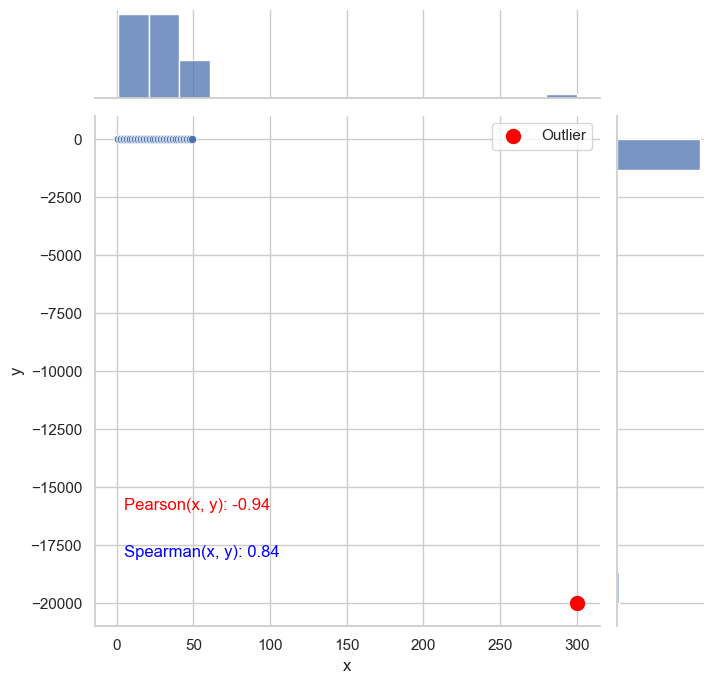

In [44]:
# Generate 49 points with a monotonic, non-linear relationship
np.random.seed(42)
x_values = np.linspace(1, 49, 49)
y_values = np.sqrt(x_values) + np.random.normal(scale=0.5, size=49)  # Square root relationship with noise

# Introduce an extreme outlier at index 50
x_outlier = 300  # Outlier far to the right
y_outlier = -20000  # Extreme outlier in y

# Combine data
x_full = np.append(x_values, x_outlier)
y_full = np.append(y_values, y_outlier)

# Create DataFrame
df_full = pd.DataFrame({"Index": np.arange(1, 51), "x": x_full, "y": y_full})

# Compute Pearson and Spearman correlations
pearson_full = pearsonr(x_full, y_full)[0]  # Pearson correlation with outlier
spearman_full = spearmanr(x_full, y_full)[0]  # Spearman correlation with outlier

# Print the dataset as a table
print(df_full.to_string(index=False))

# Plot jointplot
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
g = sns.jointplot(data=df_full, x="x", y="y", kind="scatter", height=7, marginal_kws={'bins': 15})

# Annotate with Pearson and Spearman correlations
g.ax_joint.text(5, -16000, f"Pearson(x, y): {pearson_full:.2f}", fontsize=12, color="red")
g.ax_joint.text(5, -18000, f"Spearman(x, y): {spearman_full:.2f}", fontsize=12, color="blue")

# Highlight outlier
g.ax_joint.scatter(x_outlier, y_outlier, color='red', s=100, label="Outlier")
g.ax_joint.legend()

plt.show()

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

 Index     x           y
     1   1.0   49.496714
     2   2.0   47.861736
     3   3.0   47.647689
     4   4.0   47.523030
     5   5.0   44.765847
     6   6.0   43.765863
     7   7.0   44.579213
     8   8.0   42.767435
     9   9.0   40.530526
    10  10.0   40.542560
    11  11.0   38.536582
    12  12.0   37.534270
    13  13.0   37.241962
    14  14.0   34.086720
    15  15.0   33.275082
    16  16.0   33.437712
    17  17.0   31.987169
    18  18.0   32.314247
    19  19.0   30.091976
    20  20.0   28.587696
    21  21.0   30.465649
    22  22.0   27.774224
    23  23.0   27.067528
    24  24.0   24.575252
    25  25.0   24.455617
    26  26.0   24.110923
    27  27.0   21.849006
    28  28.0   22.375698
    29  29.0   20.399361
    30  30.0   19.708306
    31  31.0   18.398293
    32  32.0   19.852278
    33  33.0   16.986503
    34  34.0   14.942289
    35  35.0   15.822545
    36  36.0   12.779156
    37  37.0   13.208864
    38  38.0   10.040330
    39  39.0    9.671814


<Figure size 600x600 with 0 Axes>

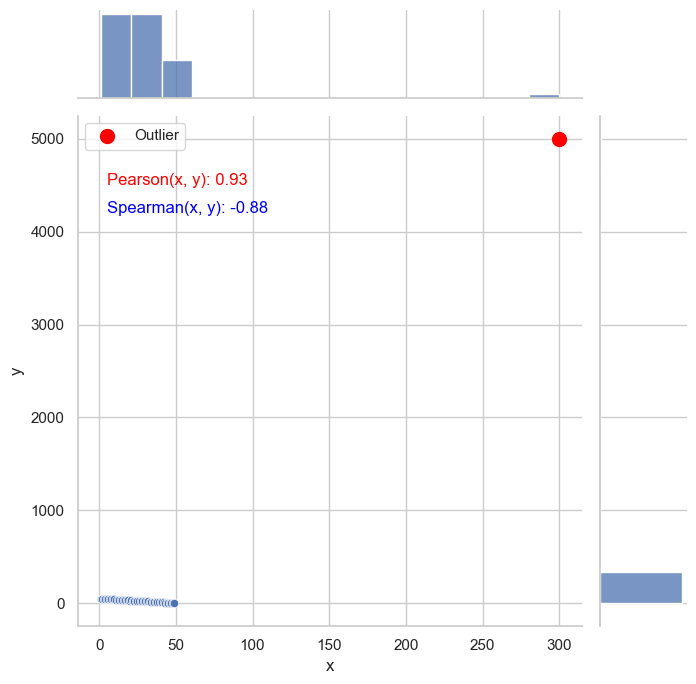

In [45]:
# Generate 49 points with a monotonic decreasing relationship
np.random.seed(42)
x_values = np.linspace(1, 49, 49)
y_values = 50 - x_values + np.random.normal(scale=1.0, size=49)  # Decreasing function with noise

# Introduce an extreme positive outlier at index 50
x_outlier = 300  # Outlier far to the right
y_outlier = 5000  # Extreme positive outlier in y

# Combine data
x_full = np.append(x_values, x_outlier)
y_full = np.append(y_values, y_outlier)

# Create DataFrame
df_full = pd.DataFrame({"Index": np.arange(1, 51), "x": x_full, "y": y_full})

# Compute Pearson and Spearman correlations
pearson_full = pearsonr(x_full, y_full)[0]  # Pearson correlation with outlier
spearman_full = spearmanr(x_full, y_full)[0]  # Spearman correlation with outlier

# Print the dataset as a table
print(df_full.to_string(index=False))

# Plot jointplot
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
g = sns.jointplot(data=df_full, x="x", y="y", kind="scatter", height=7, marginal_kws={'bins': 15})

# Annotate with Pearson and Spearman correlations
g.ax_joint.text(5, 4500, f"Pearson(x, y): {pearson_full:.2f}", fontsize=12, color="red")
g.ax_joint.text(5, 4200, f"Spearman(x, y): {spearman_full:.2f}", fontsize=12, color="blue")

# Highlight outlier
g.ax_joint.scatter(x_outlier, y_outlier, color='red', s=100, label="Outlier")
g.ax_joint.legend()

plt.show()

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

In [46]:
print("Kendall and Spearman both measure how well data follows a monotonic trend, just in different ways. Because of this, their values can't differ by 1.2 or more.")

Kendall and Spearman both measure how well data follows a monotonic trend, just in different ways. Because of this, their values can't differ by 1.2 or more.


### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


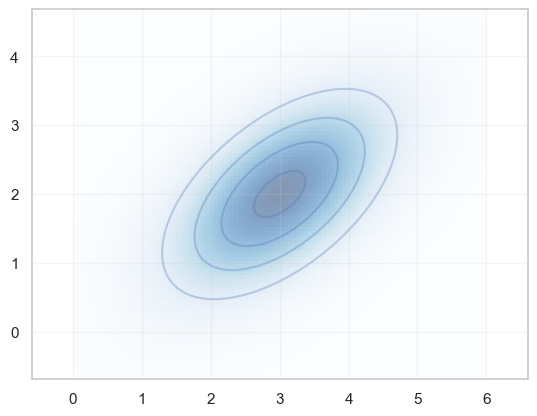

In [47]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()

means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [48]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# read csv
heart_csv = pd.read_csv(r'./heart.csv', sep='\t')

# fill missing values with median for numerical features and mode for categorical features
for feature in heart_csv.columns:
    if feature in numerical:
        heart_csv[feature] = heart_csv[feature].fillna(heart_csv[feature].median())
    else:
        heart_csv[feature] = heart_csv[feature].fillna(heart_csv[feature].mode()[0])

In [49]:

def interval_confidene(feature, alpha=0.95):
    mean = feature.mean()
    std = feature.std()
    size = len(feature)

    margin_of_error = stats.norm.ppf((1 + alpha)/2) * (std / np.sqrt(size))
    return mean - margin_of_error, mean + margin_of_error


# calculate mean for each feature
means = dict()
for feature in numerical[:-1]:
    interval_healthy = interval_confidene(heart_csv[heart_csv['target'] == 0][feature])
    interval_disease = interval_confidene(heart_csv[heart_csv['target'] == 1][feature])
    print(
    f"{feature}: "
    f"healthy: mean: {heart_csv[heart_csv['target'] == 0][feature].mean():.2f} "
    f"[{interval_healthy[0]:.2f}, {interval_healthy[1]:.2f}] "
    f"disease: mean: {heart_csv[heart_csv['target'] == 1][feature].mean():.2f} "
    f"[{interval_disease[0]:.2f}, {interval_disease[1]:.2f}]"
)


age: healthy: mean: 56.67 [55.35, 57.98] disease: mean: 52.52 [51.08, 53.95]
trestbps: healthy: mean: 134.40 [131.27, 137.52] disease: mean: 129.32 [126.90, 131.73]
chol: healthy: mean: 250.57 [242.33, 258.81] disease: mean: 241.90 [233.78, 250.02]
thalach: healthy: mean: 139.07 [135.32, 142.83] disease: mean: 158.42 [155.50, 161.35]
oldpeak: healthy: mean: 1.57 [1.35, 1.79] disease: mean: 0.59 [0.47, 0.71]
ca: healthy: mean: 1.17 [0.99, 1.34] disease: mean: 0.36 [0.23, 0.49]


***Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean*:** <br>
For each feature we wiil observe the features means and confidence intervals. if a mean is smaller/larger from the other, and the confidence intervals do not overlap, we can state that with confidence of 95% this mean is smaller/larger.<br>
> **Age feature:** the mean of the healthy population is $56.67$ with confidence interval of $[55.35, 57.98]$, and the mean of the disease population is $52.52$ with confidence interval of $[51.08, 53.95]$. <br> since $\mu_{age, healthy} > \mu_{age, disease}$ and the intervals do not overlap, we can state that the healthy population (target = 0) mean is larger than the disease population (target = 1) mean.

> **Resting blood pressure (trestbps) feature:** the mean of the healthy population is $134.4$ with confidence interval of $[131.27, 137.52]$, and the mean of the disease population is $129.32$ with confidence interval of $[126.90, 131.73]$. <br> $\mu_{trestbps, healthy} > \mu_{trestbps, disease}$ but there is an overlap of $~0.5$ between the intervals, so although it seems like we can state that $\mu_{trestbps, healthy} > \mu_{trestbps, disease}$, we can't state it with confidence of 95%.

> **Serum cholestoral (chol) feature:** the mean of the healthy population is $250.57$ with confidence interval of $[242.33, 258.81]$, and the mean of the disease population is $241.90$ with confidence interval of $[233.78, 250.02]$. <br> The confidence intervals overlap, so we can't state that one is smaller/larger than the other.

> **Maximum heart rate achieved (thalach) feature:** the mean of the healthy population is $139.07$ with confidence interval of $[135.32, 142.83]$, and the mean for the disease population is $158.42$ with confidence interaval $[155.50, 161,35]$. the confidece interavls do not overlap, so we can state with confidence of 95% that $\mu_{thalach, healthy} < \mu_{thalach, disease}$.

> **ST depression induced by exercise relative to rest (oldpeak) feature:** the mean of the healthy population is $1.57$ with confidence interval $[1.35, 1.79]$, and for the disease population the mean is $0.59$ with confidence interval $[0.47, 0.71]$. The intervals do not overlap, so with confidence of 95% - $\mu_{oldpeak, healthy} > \mu_{oldpeak, disease}$

> **Number of major vessels (0-3) colored by flourosopy (ca) feature:** the mean of the healthy population is $1.17$ with confidence interval $[0.99, 1.34]$, and for the disease population the mean is $0.36$ with confidence interval $[0.23, 0.49]$. The intervals do not overlap, so with confidence of 95% - $\mu_{ca, healthy} > \mu_{ca, disease}$

***Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions:***

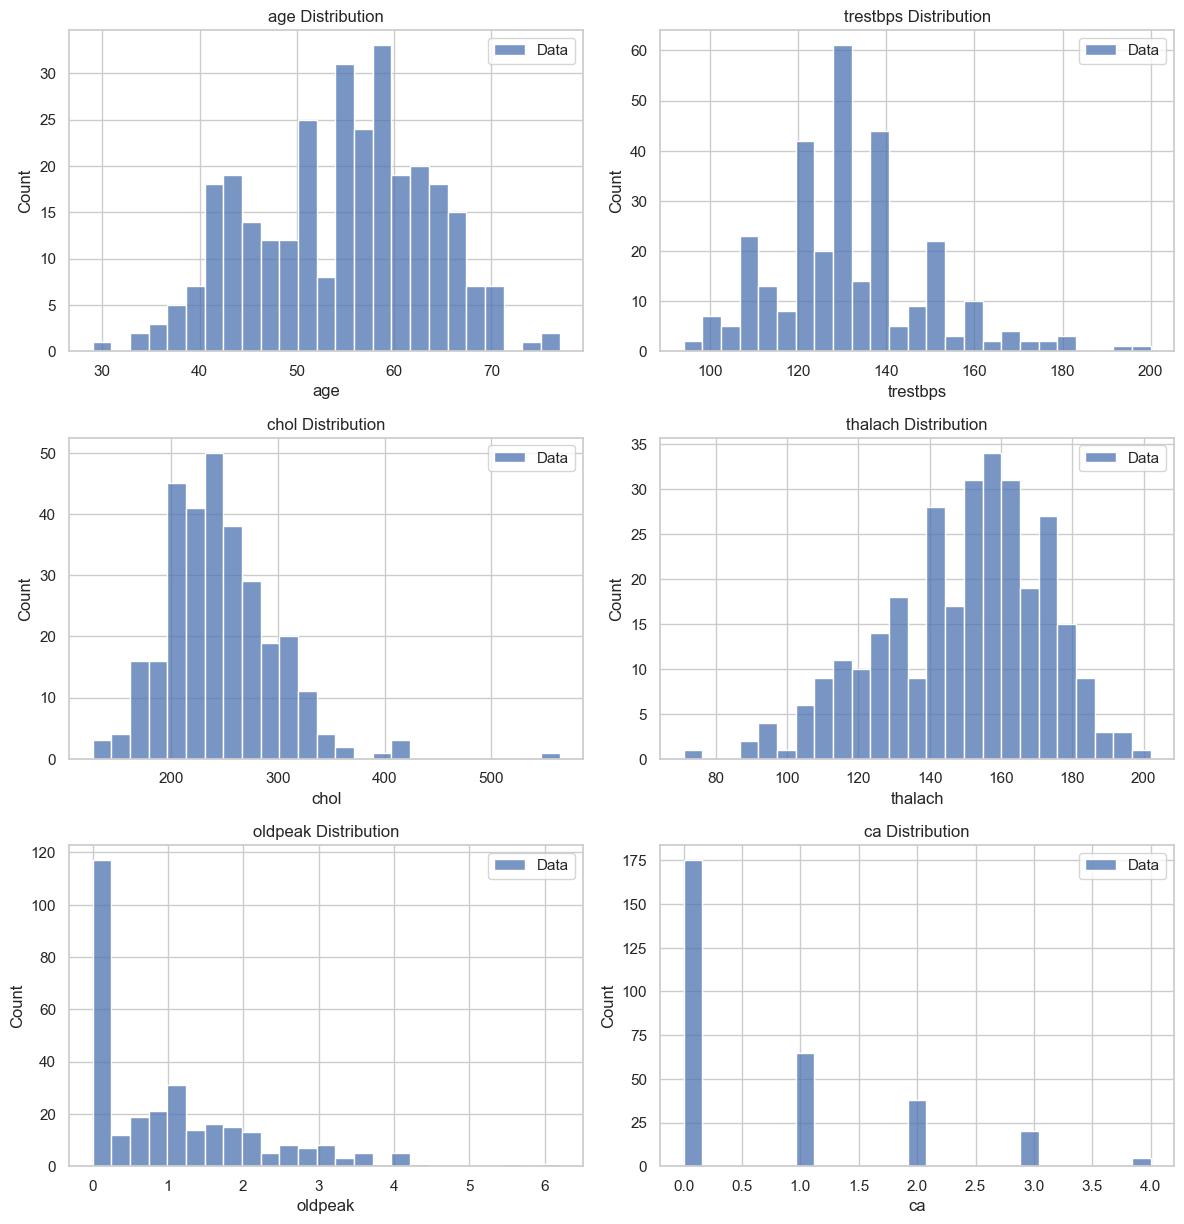

In [50]:
n_features = len(numerical)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes

for i, feature in enumerate(numerical[:-1]):
    data = heart_csv[feature]

    sns.histplot(data, kde=False, bins=25, label="Data", ax=axes[i])

    axes[i].set_title(f"{feature} Distribution")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From data graphs observation we can infer that the distributions look normal/lognormal and exponential. Let's try and plot the distributions:

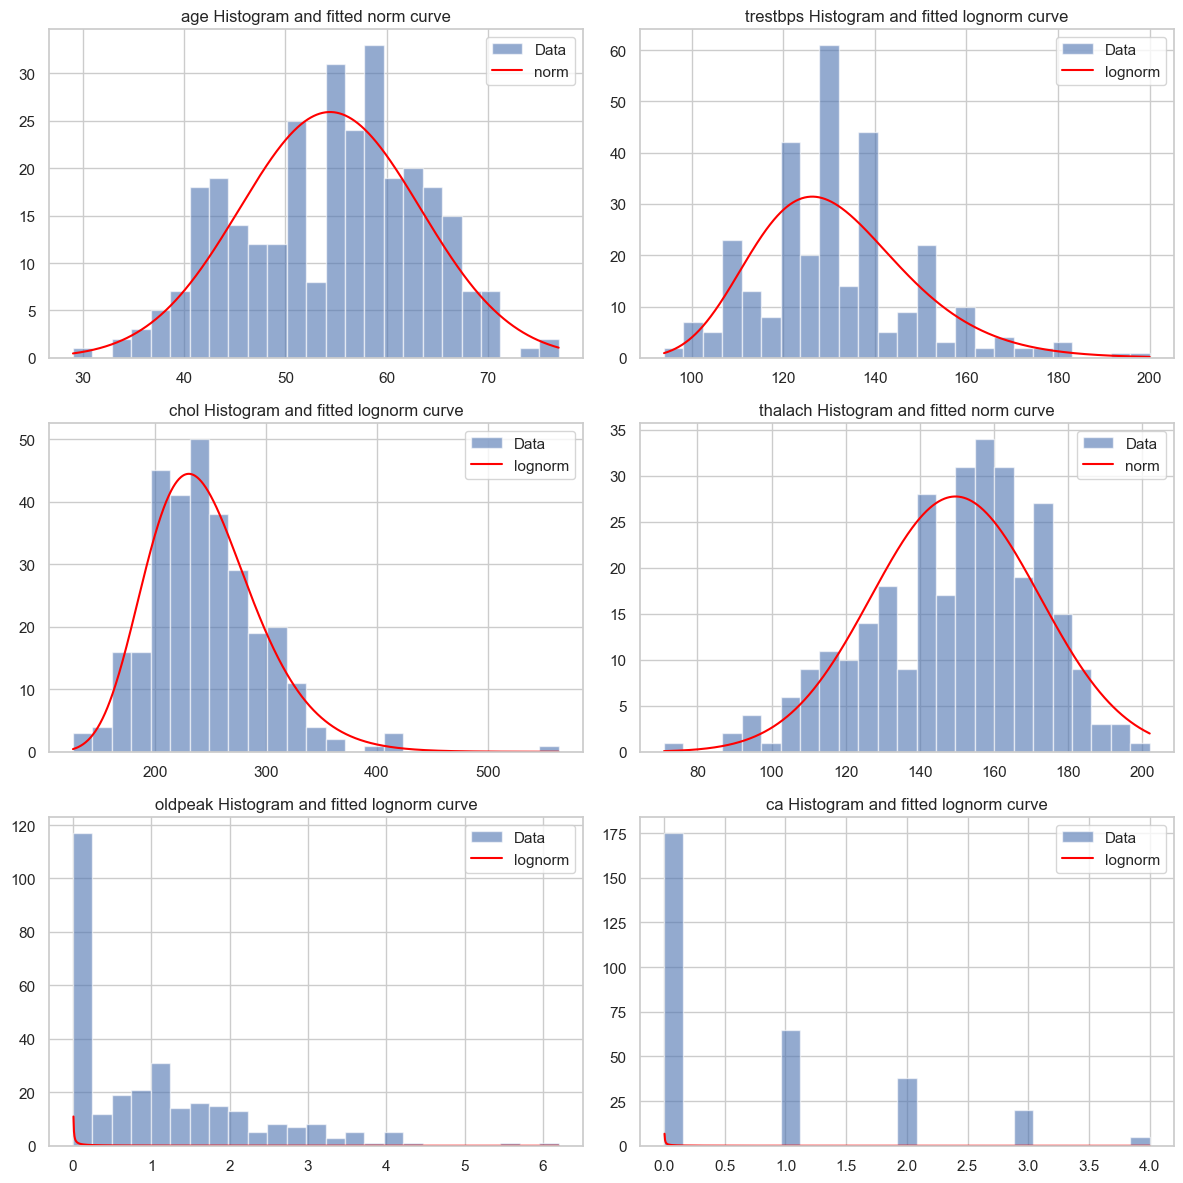

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def fit_distributions(data, features):
    distributions = [st.norm, st.lognorm, st.expon]
    features_dist = dict()
    for feature in features:
        min_mle = float('inf')
        for dist in distributions:
            fit = dist.fit(data[feature])
            mle = -np.log(dist.pdf(data[feature], *fit)).sum()
            if mle <= min_mle:
                min_mle = mle
                features_dist[feature] = dist
    return features_dist

hist_dist_fits = fit_distributions(heart_csv, numerical[:-1])

n_features = len(numerical[:-1])
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(numerical[:-1]):
    ax = axes[i]
    data = heart_csv[feature]

    x_axis = np.linspace(data.min(), data.max(), 1000)

    _, bins, _ = ax.hist(data, bins=25, alpha=0.6, label="Data")

    fit = hist_dist_fits[feature].fit(data)
    bin_width = bins[1] - bins[0]
    fit_line = len(data) * bin_width * hist_dist_fits[feature].pdf(x_axis, *fit)
    ax.plot(x_axis, fit_line, label=f"{hist_dist_fits[feature].name}", color="red")

    ax.set_title(f"{feature} Histogram and fitted {hist_dist_fits[feature].name} curve")
    ax.legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


***For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit):***

To begin, let's calculate the three correlations we know, and show them as a matrix:

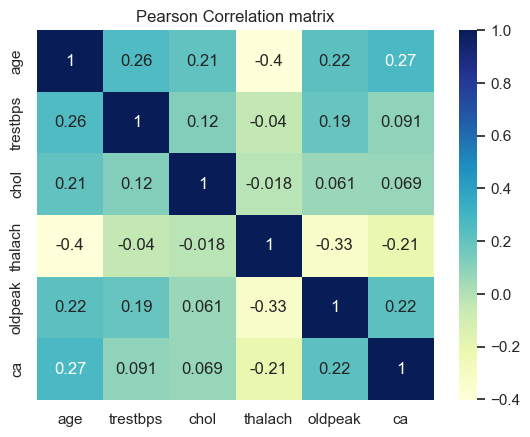

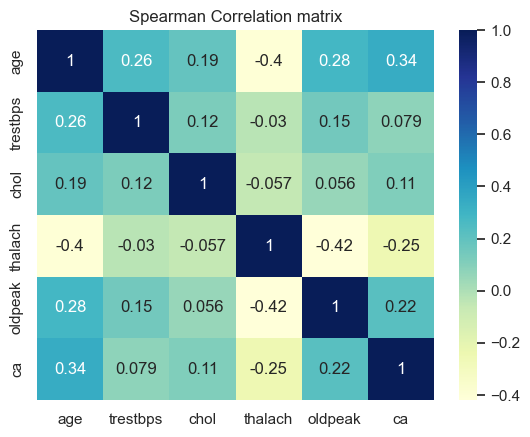

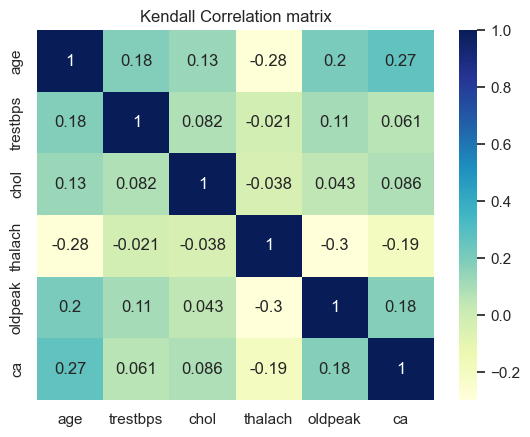

In [52]:
for correlation_type in ['pearson', 'spearman', 'kendall']:
    correlation = heart_csv[numerical[:-1]].corr(correlation_type)
    sns.heatmap(correlation, annot=True, cmap="YlGnBu")
    plt.title(f"{correlation_type[0].upper() + correlation_type[1:]} Correlation matrix")
    plt.show()

It is interesting to see that for the three known correlations, we can see significant correlations remain. The most significat are: age and thalach, oldpeak and thalach, thalach and ca.

Joint plot of age-thalach


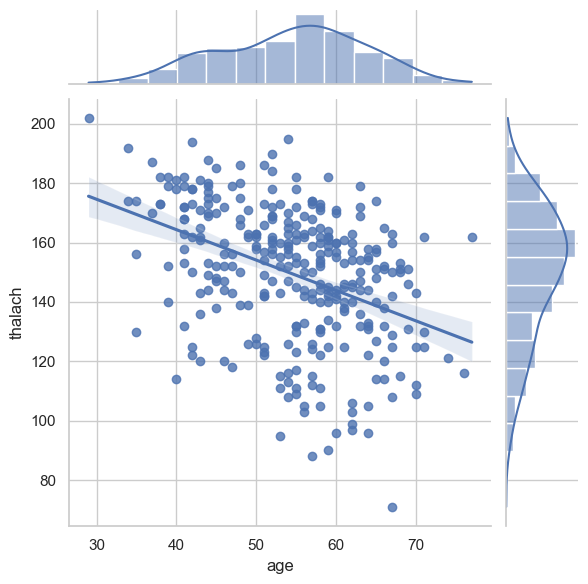

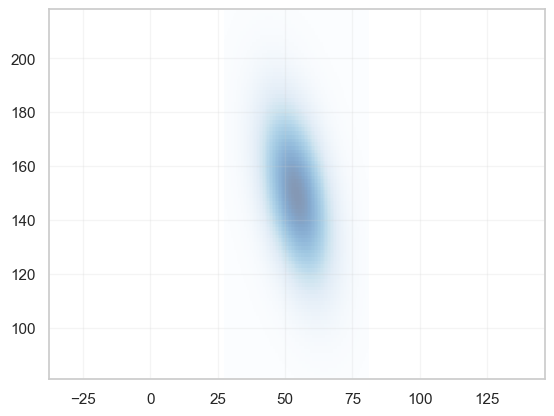

Joint plot of oldpeak-thalach


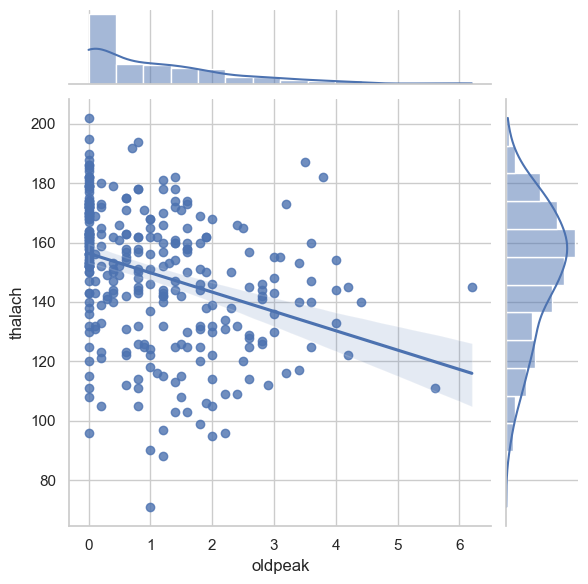

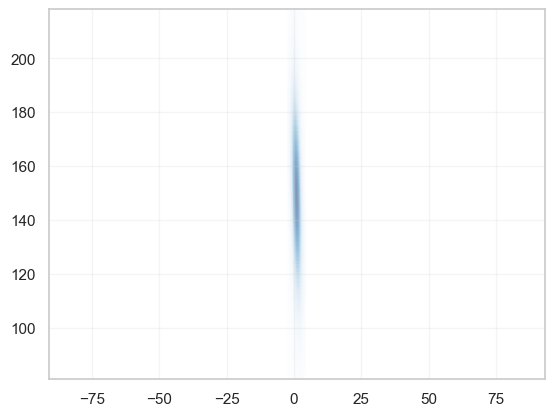

Joint plot of ca-age


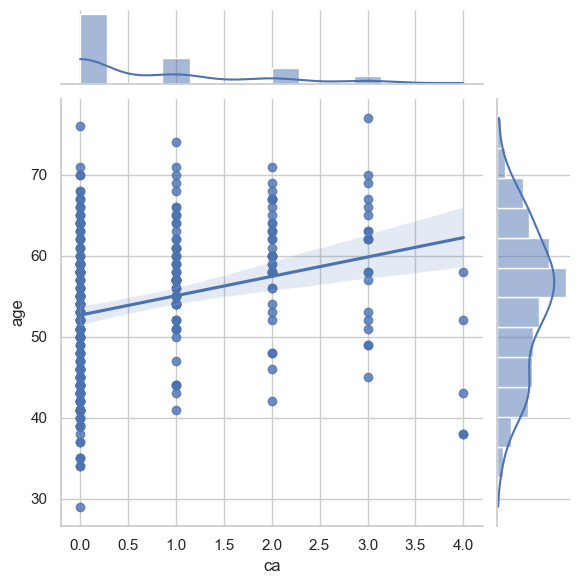

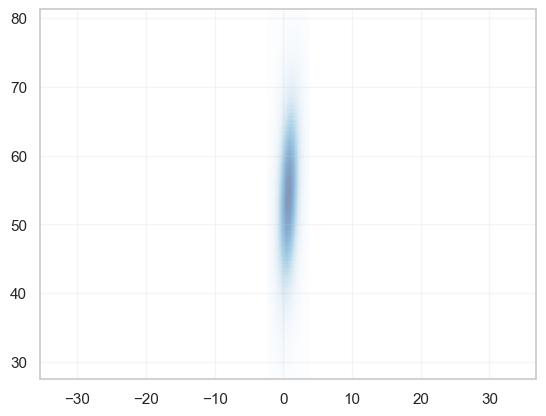

Joint plot of oldpeak-age


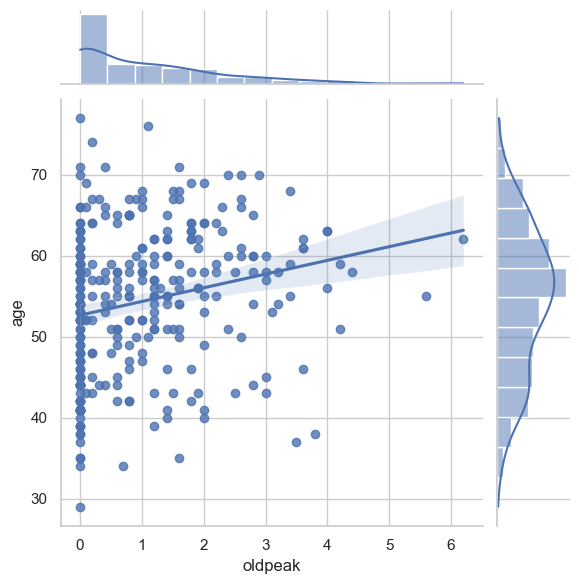

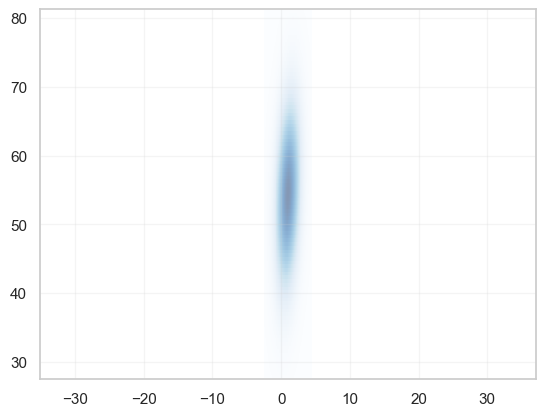

Joint plot of thalach-ca


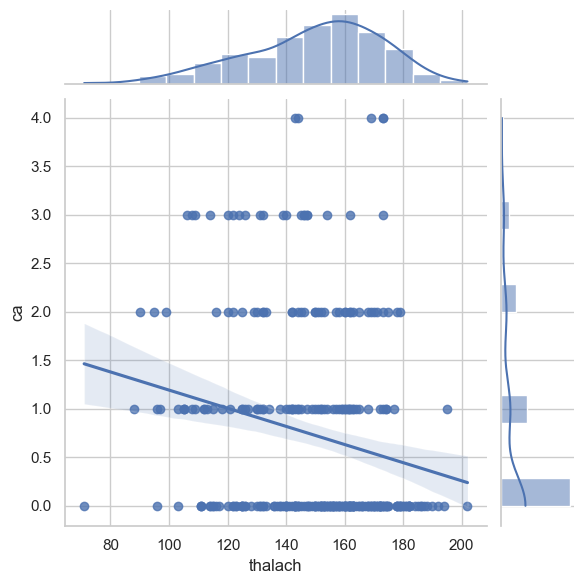

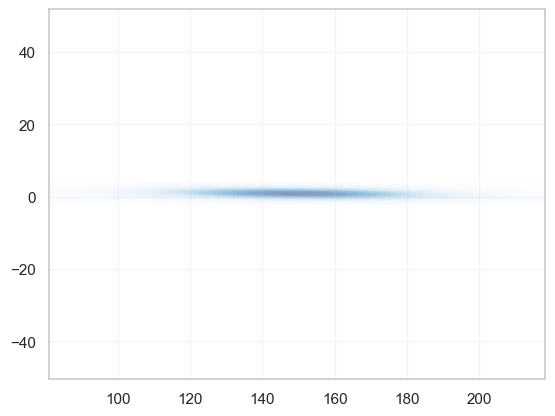

In [53]:
import warnings
warnings.filterwarnings("ignore")

pairs = [['age', 'thalach'], ['oldpeak', 'thalach'], ['ca','age'], ['oldpeak', 'age'], ['thalach', 'ca']]
# chose again - take top 3 from each correlation

for pair in pairs:
    print(f'Joint plot of {pair[0]}-{pair[1]}')
    sns.jointplot(x=heart_csv[pair[0]], y=heart_csv[pair[1]], kind='reg')
    mean= np.mean(heart_csv[[pair[0], pair[1]]], axis=0)
    cov = np.cov(heart_csv[[pair[0], pair[1]]].T)
    fig = plot_2d_Gaussian_pdf(mean, cov)
    plt.show()

***Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?***

Text(0.5, 1.0, 'Man correlation matrix')

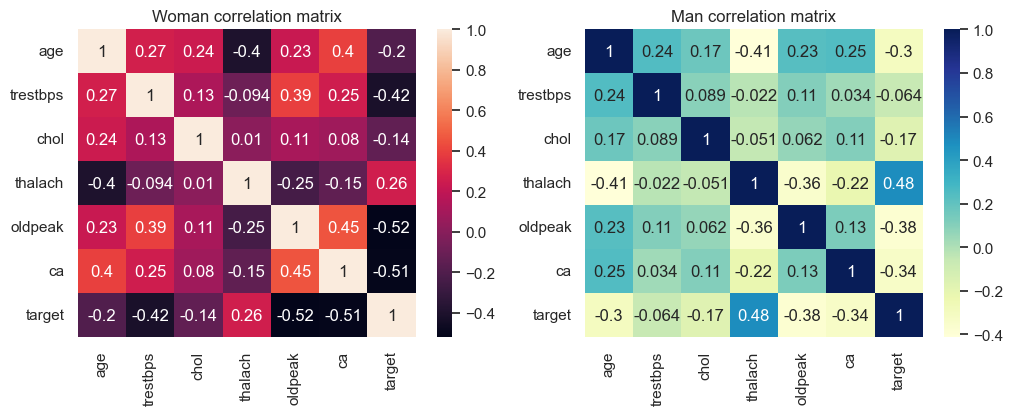

In [54]:
fix, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(heart_csv[heart_csv['sex']==0][numerical].corr(), ax=axes[0], annot=True)
axes[0].set_title('Woman correlation matrix')

sns.heatmap(heart_csv[heart_csv['sex']==1][numerical].corr(), ax=axes[1], annot=True, cmap="YlGnBu")
axes[1].set_title('Man correlation matrix')

We can notice that there are some correlations that are significantly different for man and woman. for example - the correlation between traget (being healthy/ill) to trestbps is much higher fo woman than for man, and same for ca and age. There are also features that the correlation between them seems similar for man and woman - for example oldpeak and age, or thalach and age.

In [55]:
def calculate_pval(feature1, feature2):
    _, pval = pearsonr(feature1, feature2)
    return pval

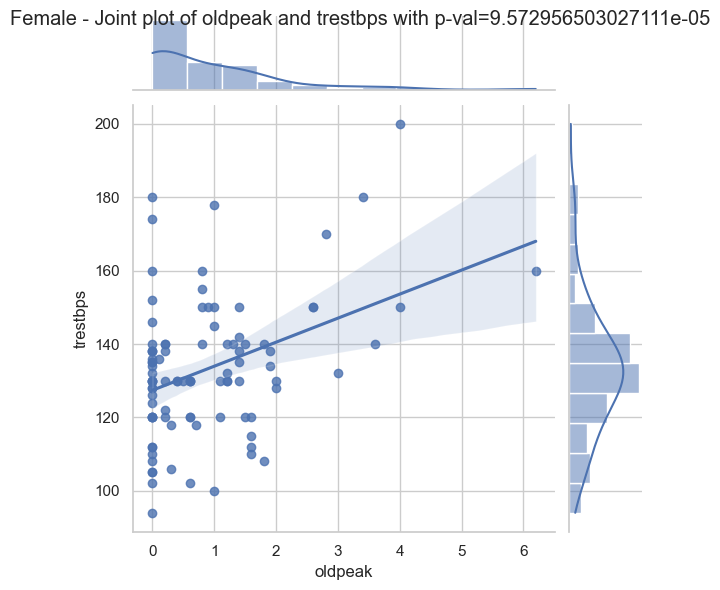

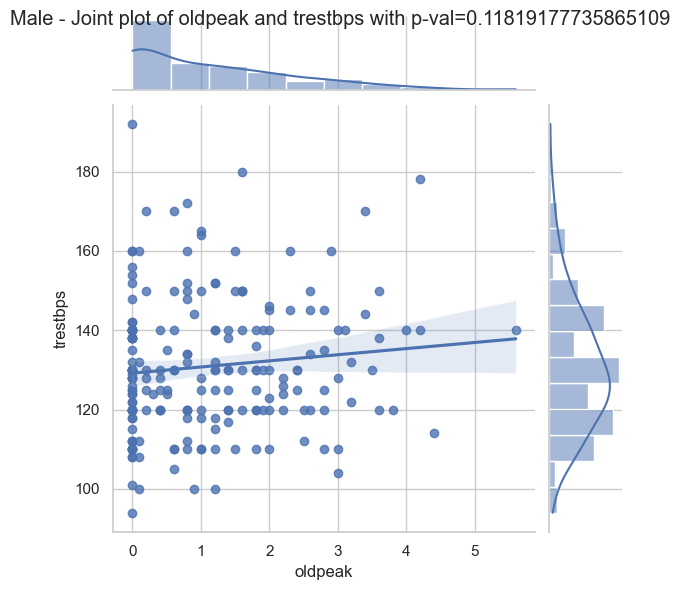

In [56]:
ax = sns.jointplot(x=heart_csv[heart_csv['sex']==0]['oldpeak'],y=heart_csv[heart_csv['sex']==0]['trestbps'], kind='reg')
pval = calculate_pval(heart_csv[heart_csv['sex']==0]['oldpeak'], heart_csv[heart_csv['sex']==0]['trestbps'])
ax.fig.suptitle(f'Female - Joint plot of oldpeak and trestbps with p-val={pval}')

ax = sns.jointplot(x=heart_csv[heart_csv['sex']==1]['oldpeak'],y=heart_csv[heart_csv['sex']==1]['trestbps'], kind='reg')
pval = calculate_pval(heart_csv[heart_csv['sex']==1]['oldpeak'], heart_csv[heart_csv['sex']==1]['trestbps'])
ax.fig.suptitle(f'Male - Joint plot of oldpeak and trestbps with p-val={pval}')
plt.show()


Text(0.5, 1.0, 'Disease correlation matrix')

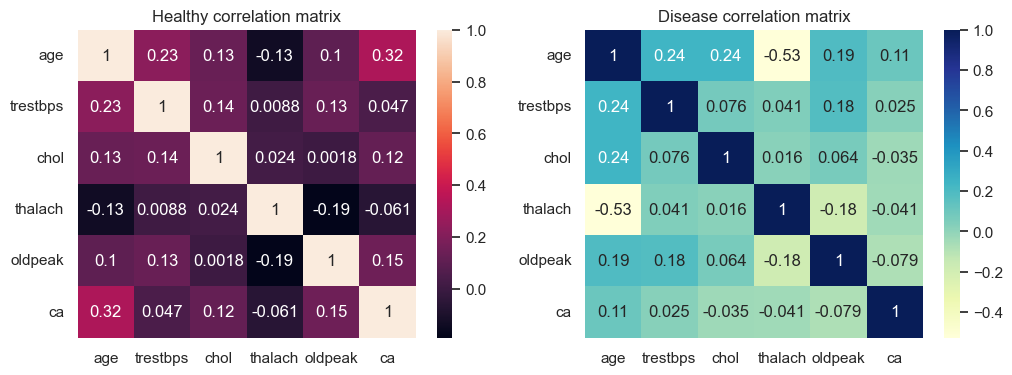

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(heart_csv[heart_csv['target']==0][numerical[:-1]].corr(), ax=axes[0], annot=True)
axes[0].set_title('Healthy correlation matrix')

sns.heatmap(heart_csv[heart_csv['target']==1][numerical[:-1]].corr(), ax=axes[1], annot=True, cmap="YlGnBu")
axes[1].set_title('Disease correlation matrix')

We can notice that there are features that the correlation between them is that same (or similar) for both populations - for example age and trestbps, but there are some that are much more significant and different between populations - like thalach and age.

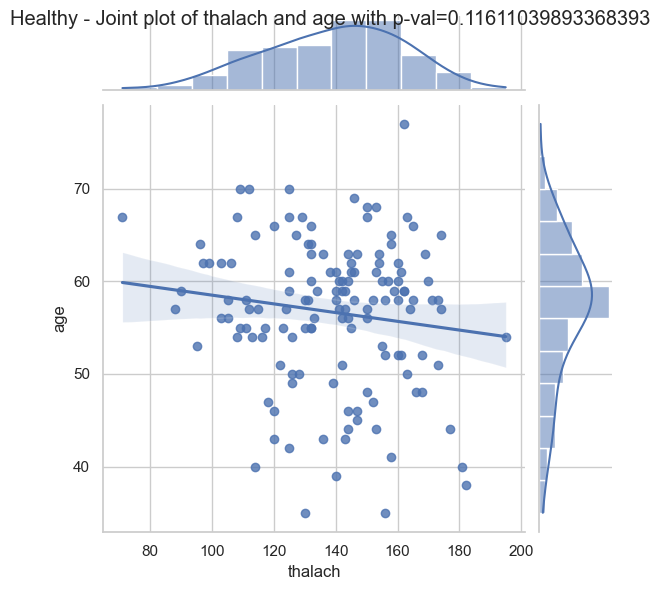

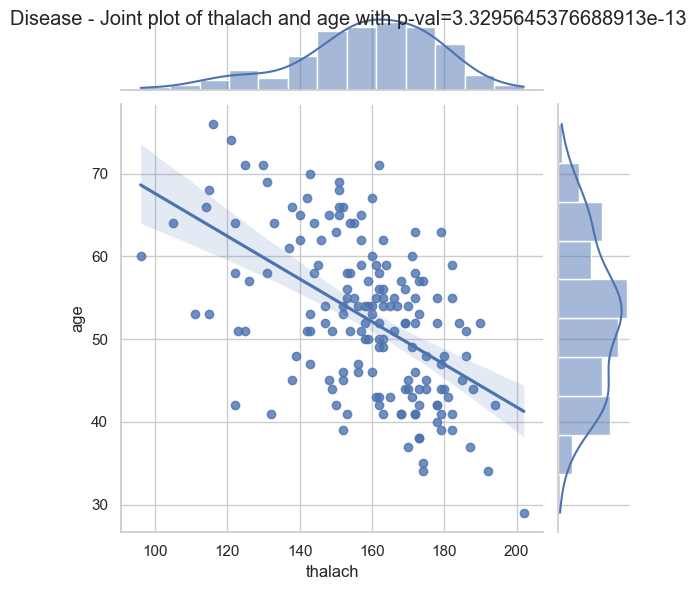

In [58]:
ax = sns.jointplot(x=heart_csv[heart_csv['target']==0]['thalach'],y=heart_csv[heart_csv['target']==0]['age'], kind='reg')
pval = calculate_pval(heart_csv[heart_csv['target']==0]['thalach'], heart_csv[heart_csv['target']==0]['age'])
ax.fig.suptitle(f'Healthy - Joint plot of thalach and age with p-val={pval}')

ax = sns.jointplot(x=heart_csv[heart_csv['target']==1]['thalach'],y=heart_csv[heart_csv['target']==1]['age'], kind='reg')
pval = calculate_pval(heart_csv[heart_csv['target']==1]['thalach'], heart_csv[heart_csv['target']==1]['age'])
ax.fig.suptitle(f'Disease - Joint plot of thalach and age with p-val={pval}')
plt.show()

***For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease:***

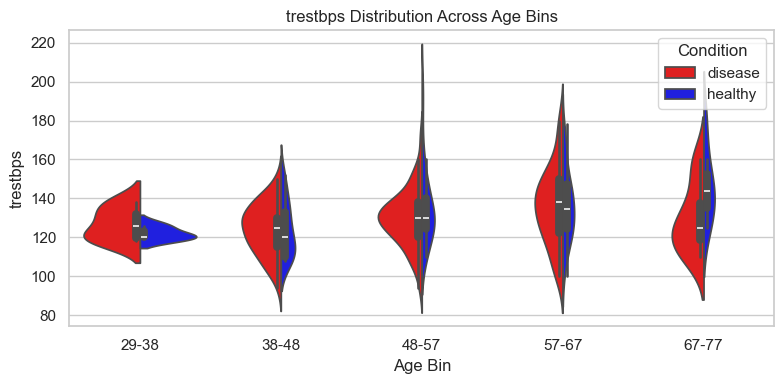

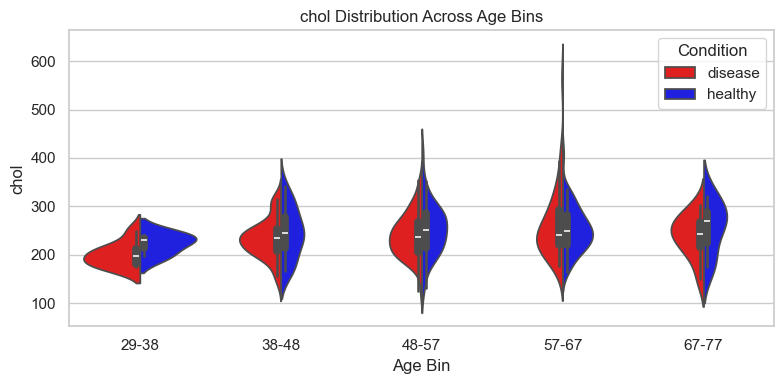

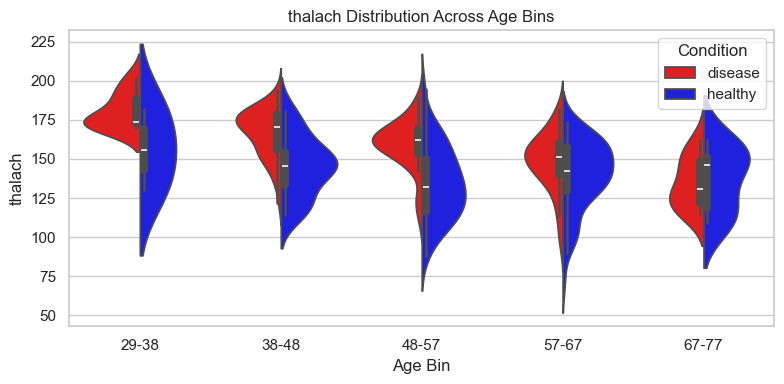

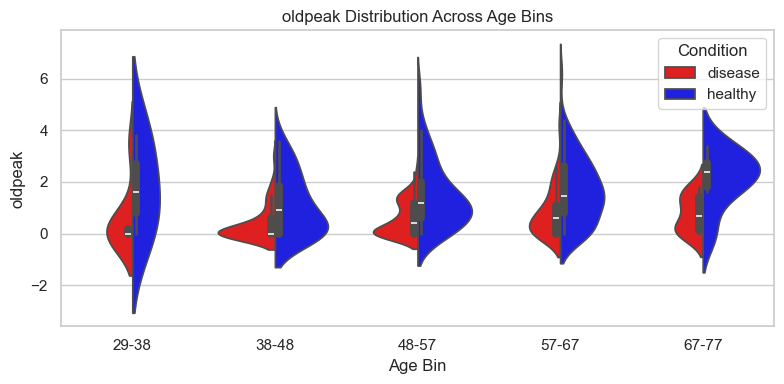

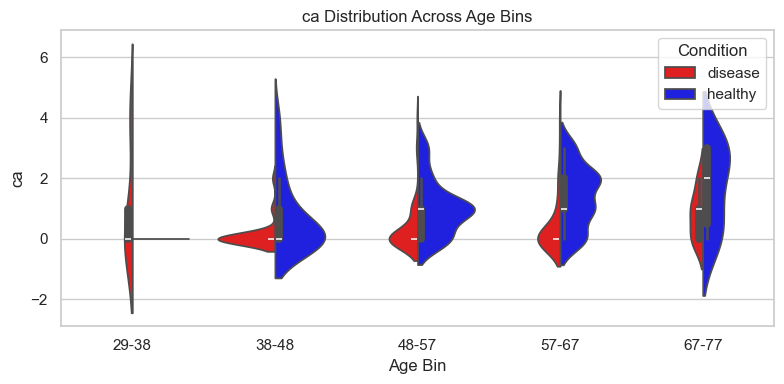

In [59]:
bin_edges = np.linspace(heart_csv['age'].min(), heart_csv['age'].max(), 6)  # 5 bins = 6 edges
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]
heart_csv['age_bin'] = pd.cut(heart_csv['age'], bins=bin_edges, labels=bin_labels, include_lowest=True)

heart_csv['condition'] = heart_csv['target'].map({0: 'healthy', 1: 'disease'})

for feature in numerical[:-1]:
    if feature == 'age':
        continue
    plt.figure(figsize=(8,4))
    sns.violinplot(
        x='age_bin',
        y=feature,
        hue='condition',
        data=heart_csv,
        split=True,
        palette={'healthy' : 'blue', 'disease' : 'red'}
    )
    plt.title(f'{feature} Distribution Across Age Bins')
    plt.xlabel('Age Bin')
    plt.ylabel(feature)
    plt.legend(title='Condition', loc='upper right')
    plt.tight_layout()
    plt.show()

***Suggest, state and address at least one original question:***
> Show correlation between every two features for different ca groups and infer if there are differences between corrlations for different ca's.


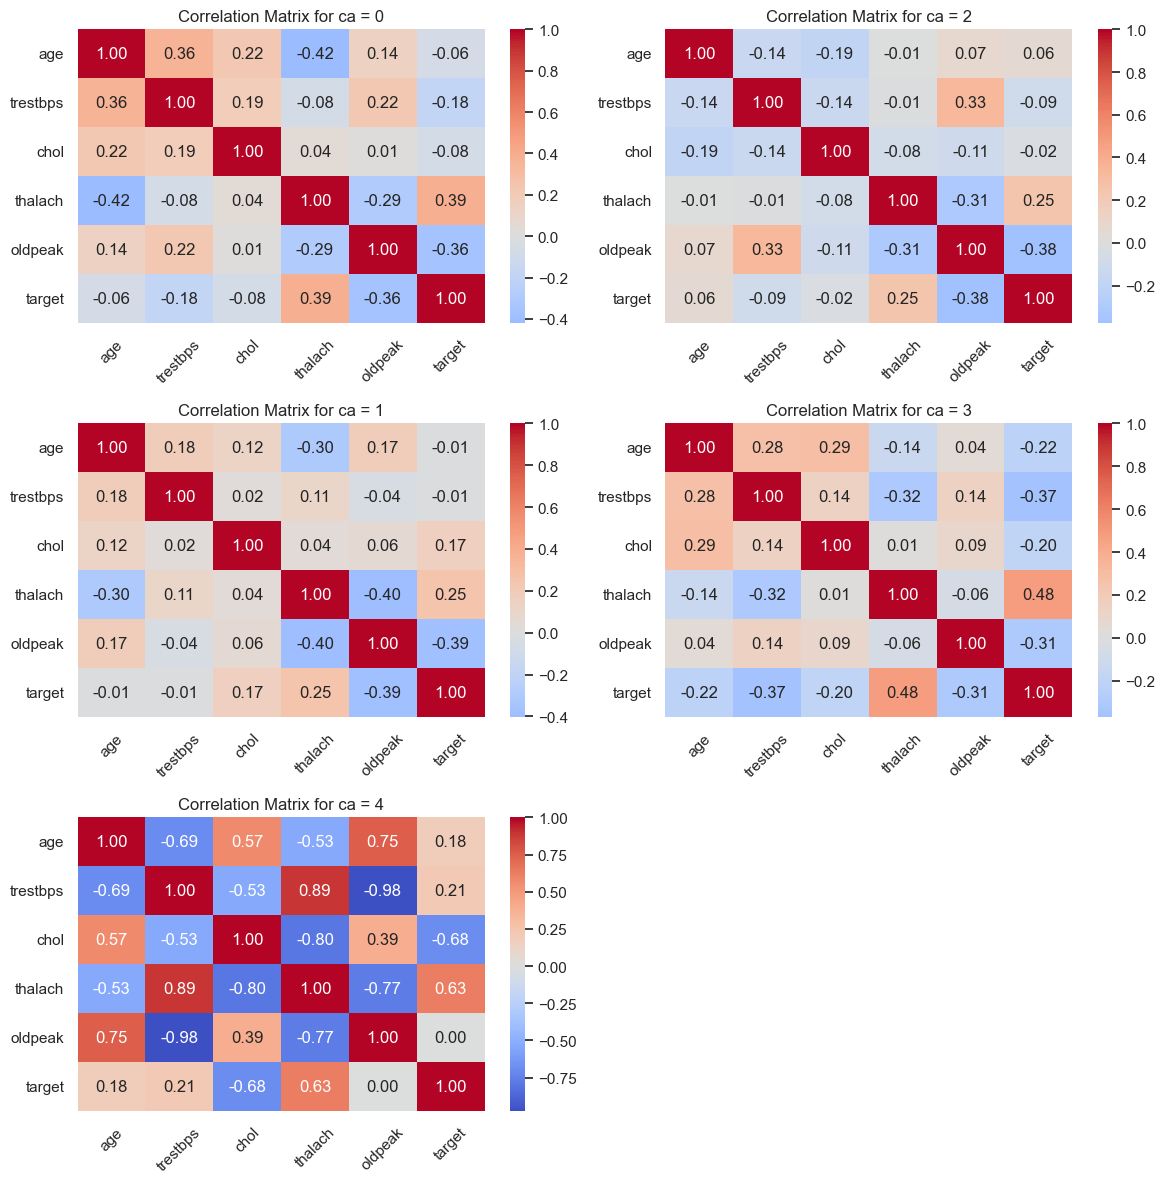


--- Analysis for ca = 0 ---
Joint plot of oldpeak-thalach for ca = 0


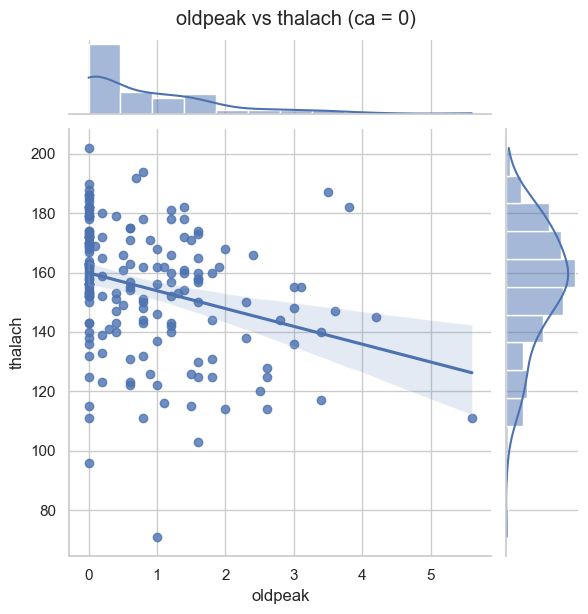

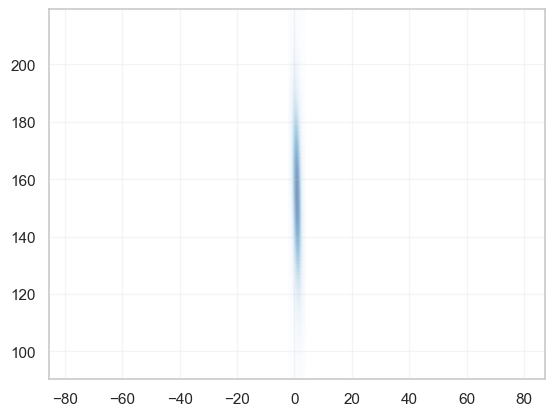

Joint plot of chol-oldpeak for ca = 0


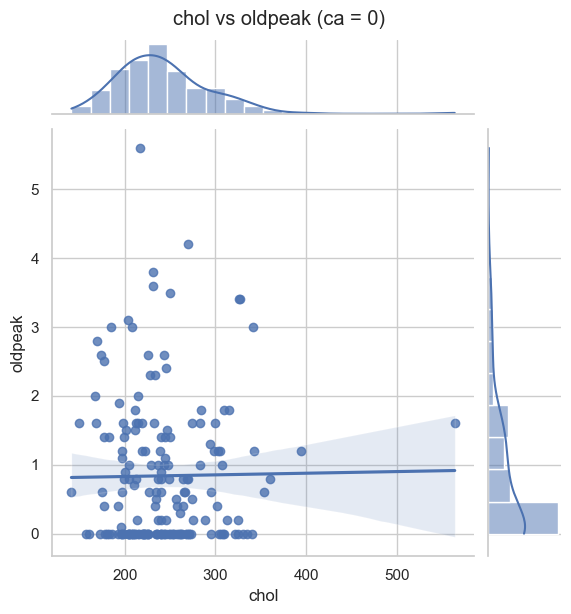

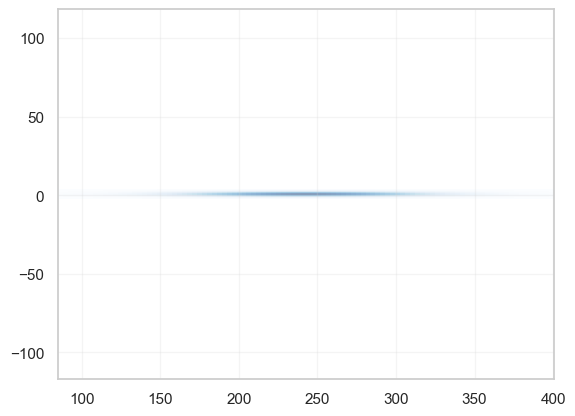

Joint plot of chol-trestbps for ca = 0


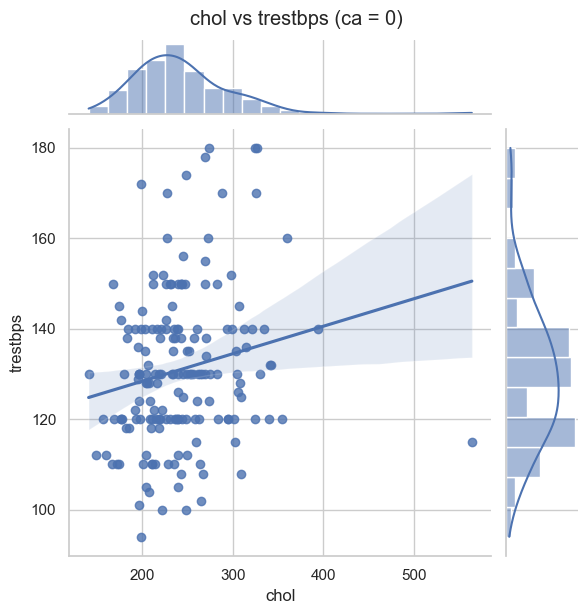

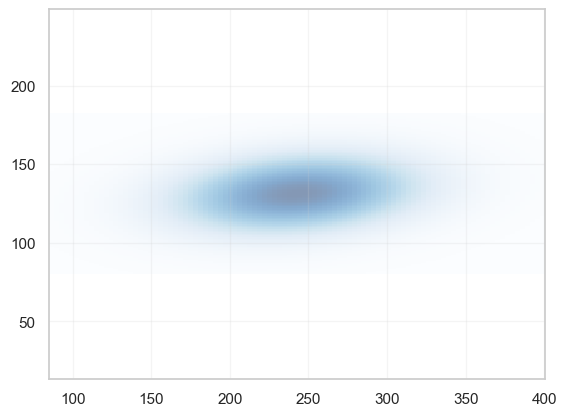


--- Analysis for ca = 2 ---
Joint plot of oldpeak-thalach for ca = 2


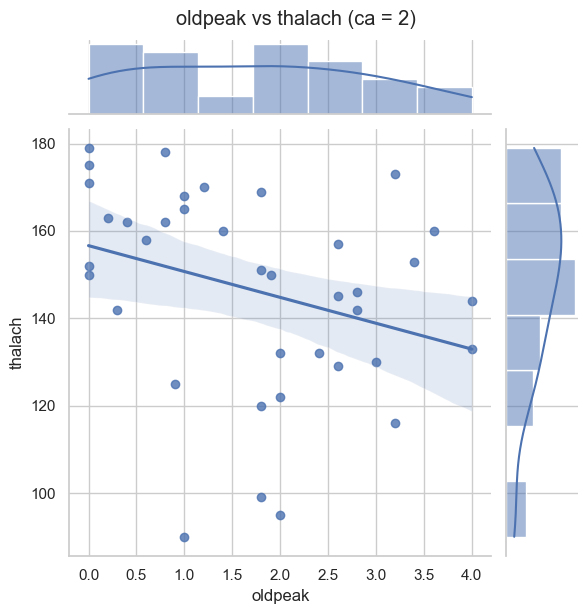

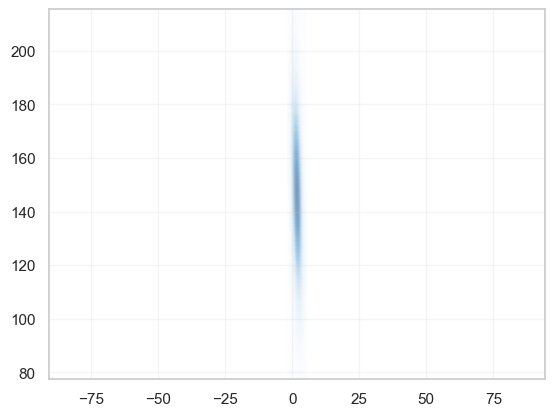

Joint plot of chol-oldpeak for ca = 2


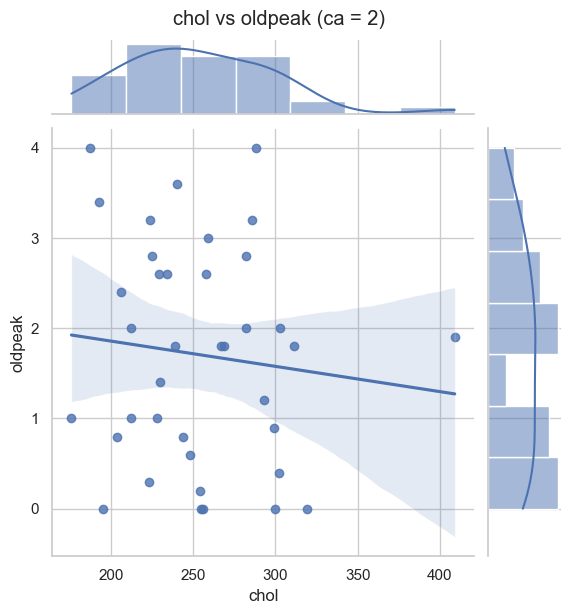

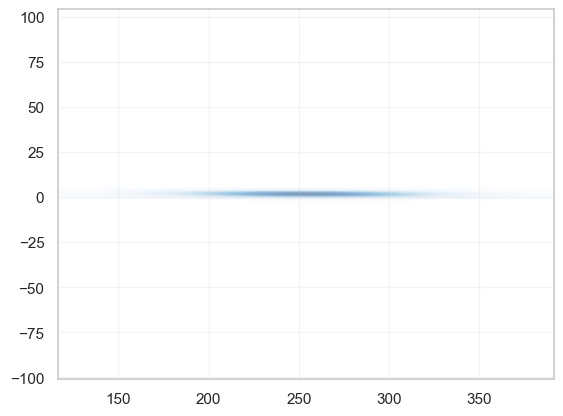

Joint plot of chol-trestbps for ca = 2


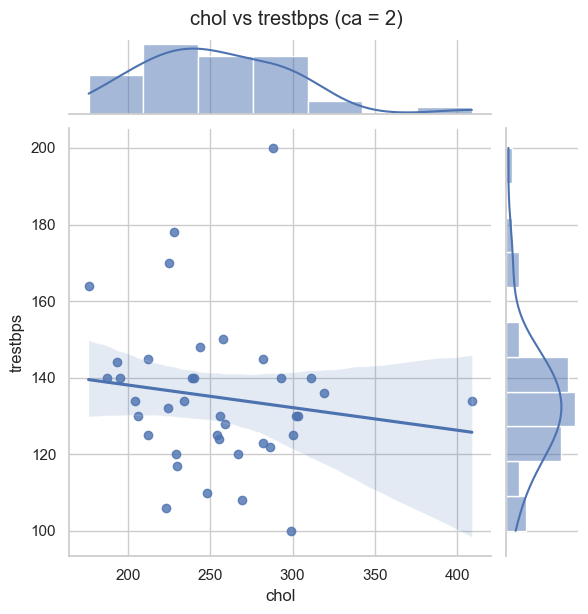

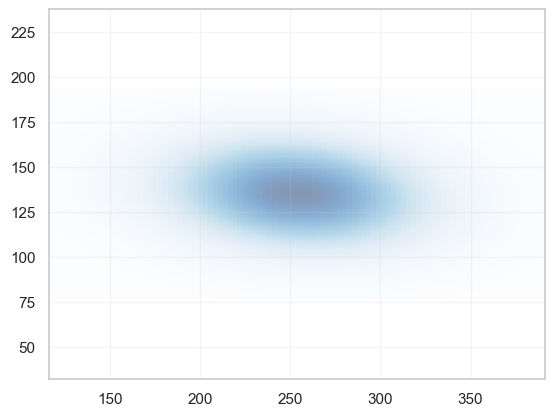


--- Analysis for ca = 1 ---
Joint plot of oldpeak-thalach for ca = 1


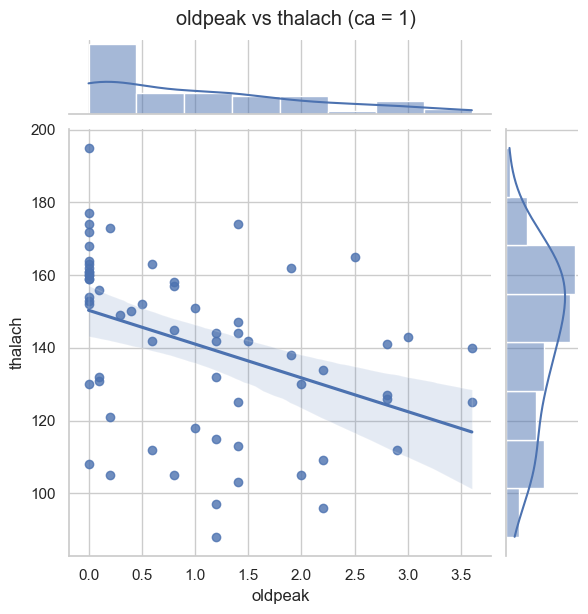

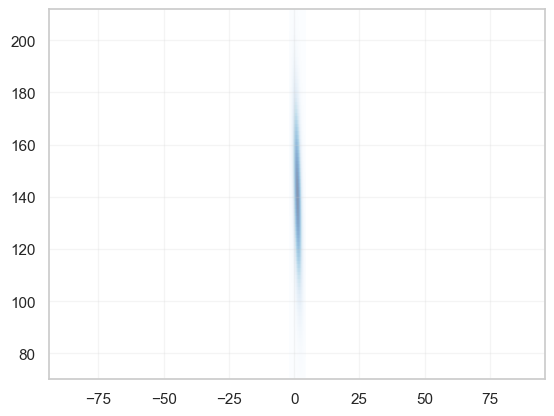

Joint plot of chol-oldpeak for ca = 1


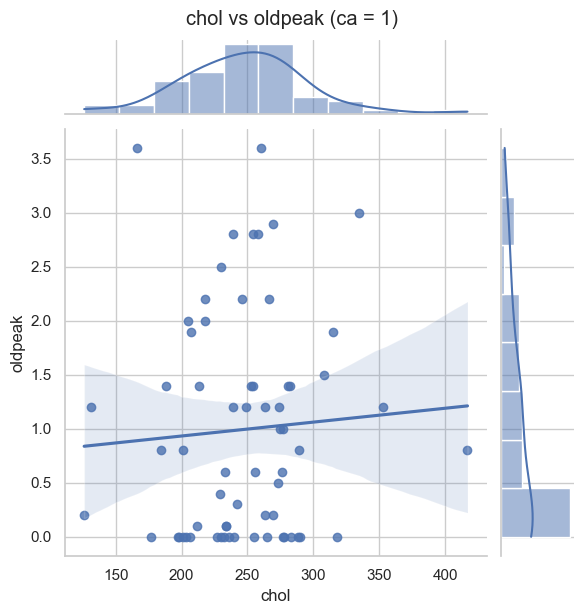

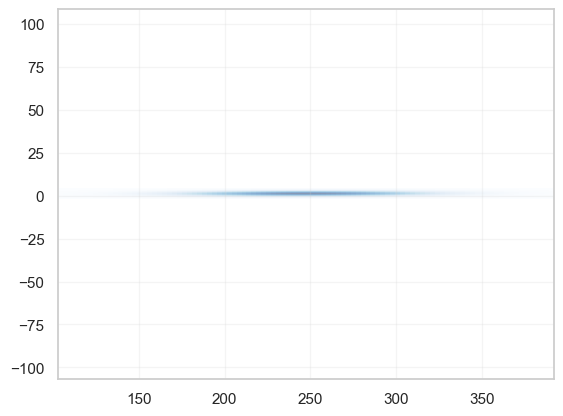

Joint plot of chol-trestbps for ca = 1


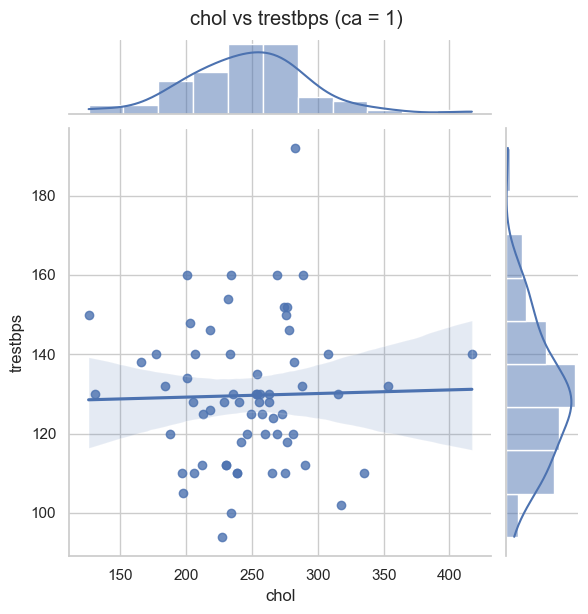

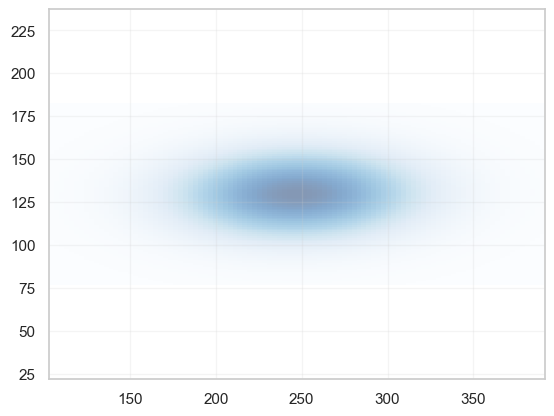


--- Analysis for ca = 3 ---
Joint plot of oldpeak-thalach for ca = 3


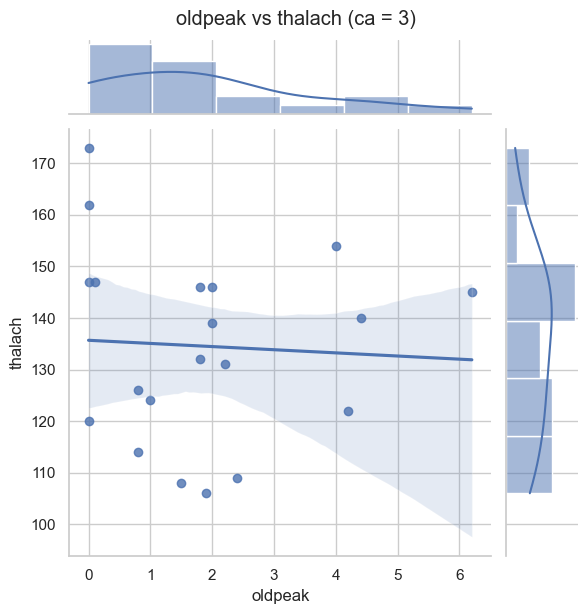

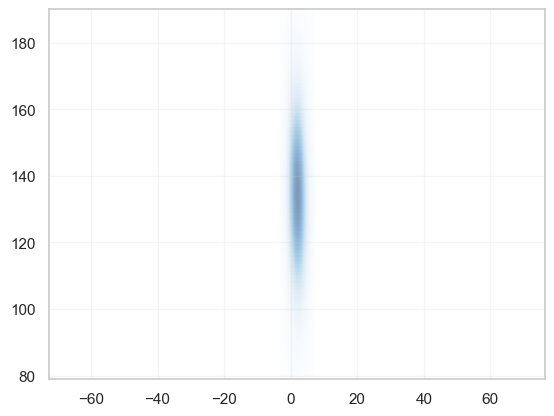

Joint plot of chol-oldpeak for ca = 3


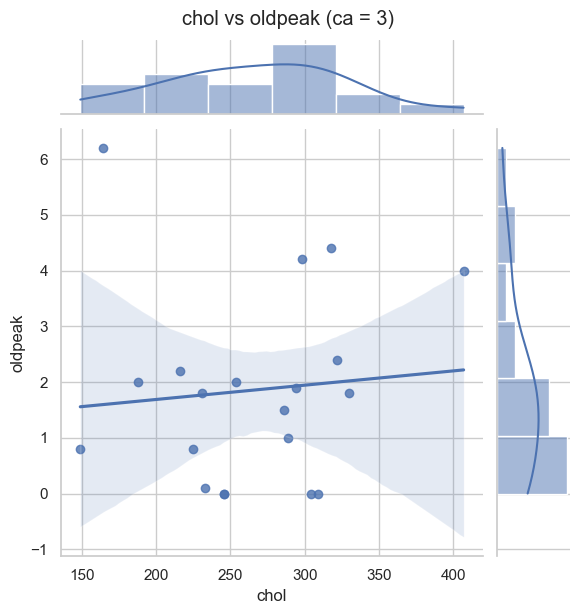

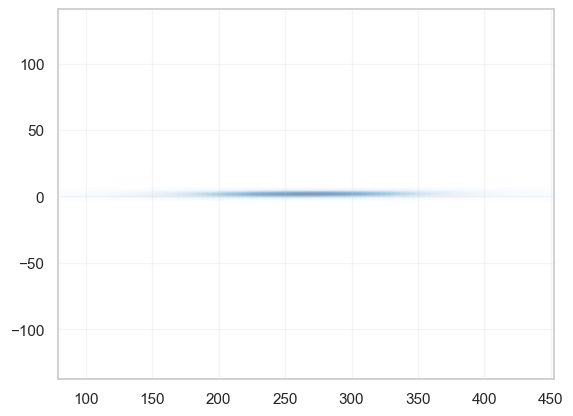

Joint plot of chol-trestbps for ca = 3


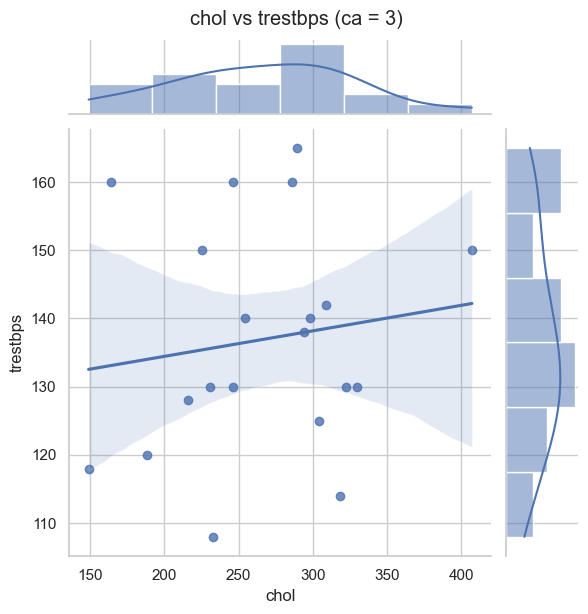

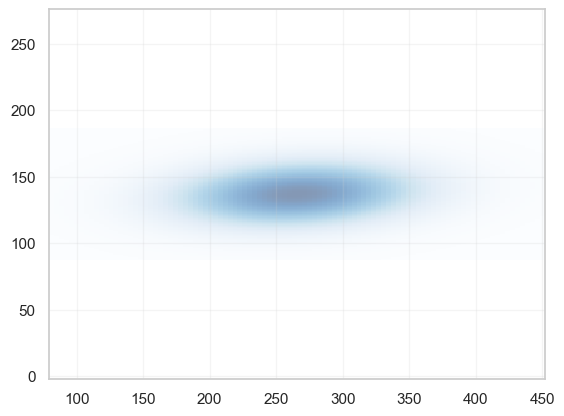


--- Analysis for ca = 4 ---
Joint plot of oldpeak-thalach for ca = 4


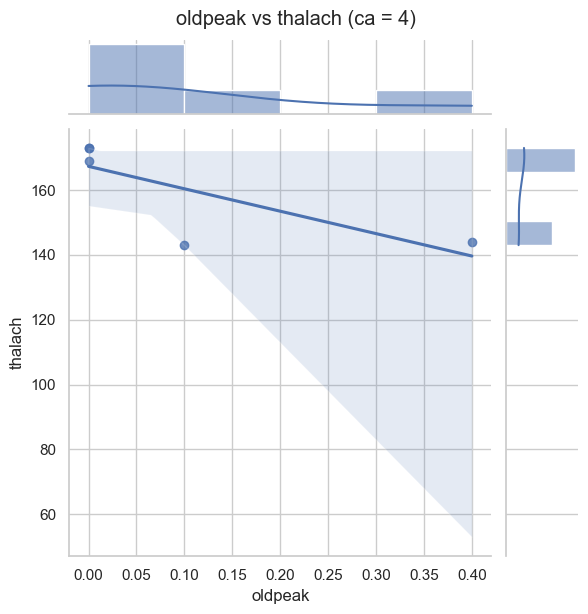

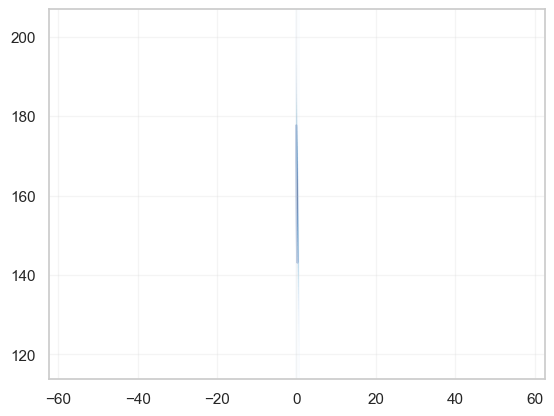

Joint plot of chol-oldpeak for ca = 4


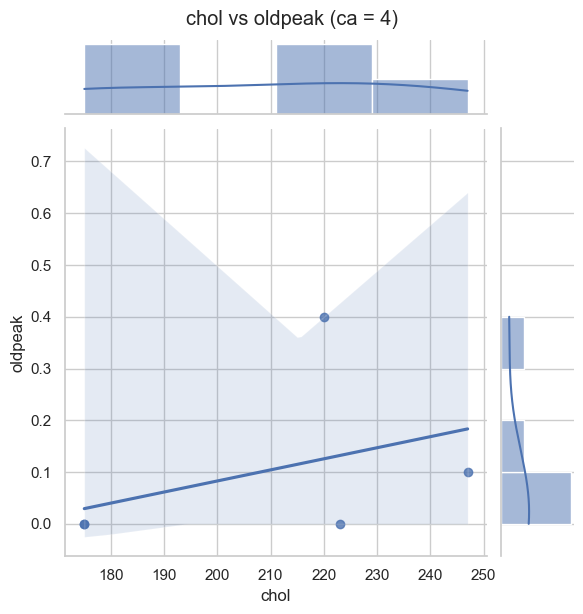

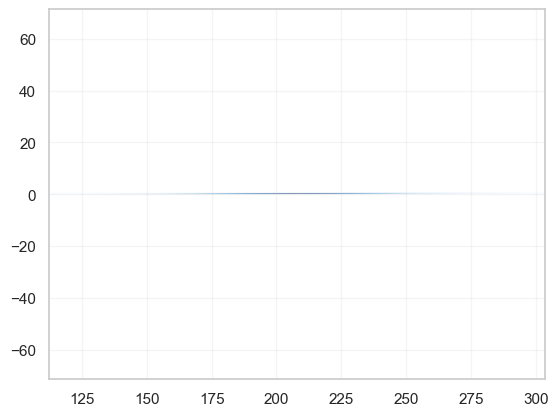

Joint plot of chol-trestbps for ca = 4


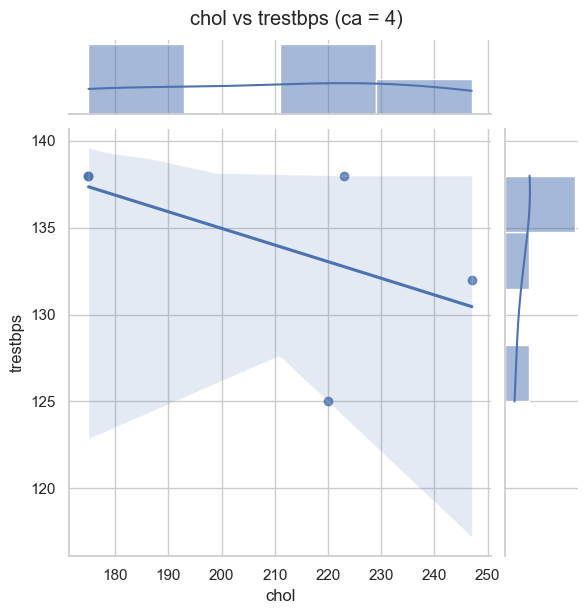

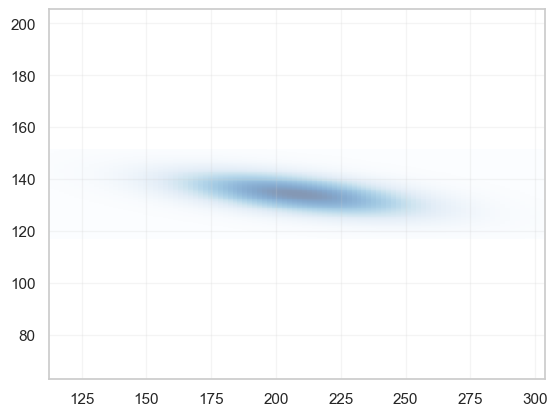

In [60]:
# Define numerical features
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
pairs = [['oldpeak', 'thalach'], ['chol', 'oldpeak'], ['chol', 'trestbps']]

n_groups = len(heart_csv['ca'].unique())
n_cols = 2
n_rows = (n_groups + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

correlation_results = {}
for i, group in enumerate(heart_csv['ca'].unique()):
    group_data = heart_csv[heart_csv['ca'] == group]
    correlation_matrix = group_data[numerical].corr()
    correlation_results[group] = correlation_matrix

    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt=".2f",
        ax=axes[i]
    )
    axes[i].set_title(f'Correlation Matrix for ca = {group}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

for ca_group in heart_csv['ca'].unique():
    group_data = heart_csv[heart_csv['ca'] == ca_group]
    print(f'\n--- Analysis for ca = {ca_group} ---')

    for pair in pairs:
        print(f'Joint plot of {pair[0]}-{pair[1]} for ca = {ca_group}')
        sns.jointplot(x=group_data[pair[0]], y=group_data[pair[1]], kind='reg')
        plt.suptitle(f'{pair[0]} vs {pair[1]} (ca = {ca_group})', y=1.02)
        plt.show()

        mean = np.mean(group_data[[pair[0], pair[1]]], axis=0)
        cov = np.cov(group_data[[pair[0], pair[1]]].T)

        fig = plot_2d_Gaussian_pdf(mean, cov)
        plt.show()


### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

### Definition of a Heavy Tail:

A distribution is considered heavy-tailed if:

$$
\forall t > 0, \quad \lim_{x \to \infty} e^{t x} P(X > x) = \infty
$$

### Log-Normal Distribution:

Let $X \sim e^Y$, where $Y \sim N(0,1)$. Then:

$$
\lim_{x \to \infty} \left( e^{t x} \left( 1 - \int_{-\infty}^x P(X = u) \, du \right) \right) =
$$

$$
\lim_{x \to \infty} \left( e^{t x} \left( 1 - \int_{-\infty}^x P(Y = \ln(u)) \, du \right) \right)
$$

Using L’Hôpital’s Rule:

$$
= \lim_{x \to \infty} \frac{\phi(\ln(x))}{-t e^{-t x}} =
$$

$$
\lim_{x \to \infty} \frac{\exp\left(-\frac{(\ln(x))^2}{2}\right)}{-t e^{-t x}} =
$$

$$
\lim_{x \to \infty} \frac{\exp\left(-\frac{(\ln(x))^2}{2} + t x \right)}{-t} = \infty
$$

### Conclusion: The log-normal distribution satisfies the heavy-tail property.


### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

Let $ X_1 \sim \text{Exp}(\lambda_1) $ and $ X_2 \sim \text{Exp}(\lambda_2) $ be two independent exponential random variables.

We are tasked with calculating $ P(X_1 < X_2) $.

### Step 1: Definition of Exponential Distribution

For an exponential random variable $ X \sim \text{Exp}(\lambda) $, the probability density function (PDF) is:

$$
f_X(x) = \lambda e^{-\lambda x}, \quad x \geq 0.
$$

The cumulative distribution function (CDF) is:

$$
F_X(x) = 1 - e^{-\lambda x}, \quad x \geq 0.
$$

### Step 2: Probability Calculation

We are interested in $ P(X_1 < X_2) $. Using the joint distribution of $ X_1 $ and $ X_2 $, the probability can be expressed as:

$$
P(X_1 < X_2) = \int_0^\infty P(X_1 < x_2) f_{X_2}(x_2) \, dx_2.
$$

Here, $ P(X_1 < x_2) = F_{X_1}(x_2) $, which is the CDF of $ X_1 $, and $ f_{X_2}(x_2) $ is the PDF of $ X_2 $. Therefore:

$$
P(X_1 < X_2) = \int_0^\infty (1 - e^{-\lambda_1 x_2}) \lambda_2 e^{-\lambda_2 x_2} \, dx_2.
$$

### Step 3: Simplifying the Integral

Breaking the integral into two parts:

$$
P(X_1 < X_2) = \int_0^\infty \lambda_2 e^{-\lambda_2 x_2} \, dx_2 - \int_0^\infty \lambda_2 e^{-\lambda_1 x_2} e^{-\lambda_2 x_2} \, dx_2.
$$

The first integral is straightforward:

$$
\int_0^\infty \lambda_2 e^{-\lambda_2 x_2} \, dx_2 = 1.
$$

The second integral becomes:

$$
\int_0^\infty \lambda_2 e^{-(\lambda_1 + \lambda_2) x_2} \, dx_2 = \frac{\lambda_2}{\lambda_1 + \lambda_2}.
$$

### Step 4: Final Expression

Thus, we have:

$$
P(X_1 < X_2) = 1 - \frac{\lambda_2}{\lambda_1 + \lambda_2}.
$$

Simplifying this:

$$
P(X_1 < X_2) = \frac{\lambda_1}{\lambda_1 + \lambda_2}.
$$

### Conclusion:

The probability that $ X_1 < X_2 $ is:

$$
P(X_1 < X_2) = \frac{\lambda_1}{\lambda_1 + \lambda_2}.
$$

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [61]:
import numpy as np

# Transition matrix
T = np.array([
    [0.4, 0.2, 0.1, 0.0, 0.1, 0.2],
    [0.2, 0.4, 0.2, 0.1, 0.0, 0.1],
    [0.1, 0.2, 0.4, 0.2, 0.1, 0.0],
    [0.0, 0.1, 0.2, 0.4, 0.2, 0.1],
    [0.1, 0.0, 0.1, 0.2, 0.4, 0.2],
    [0.2, 0.1, 0.0, 0.1, 0.2, 0.4],
])

# Solve for the stationary distribution: pi * T = pi
eigvals, eigvecs = np.linalg.eig(T.T)  # Transpose for left eigenvector
stationary = eigvecs[:, np.isclose(eigvals, 1)].flatten().real  # Eigenvector for eigenvalue 1
stationary /= stationary.sum()  # Normalize to sum to 1

# Calculate the expected value
states = np.arange(1, 7)  # Possible states: 1 to 6
expected_value = np.dot(states, stationary)

print(f"Stationary distribution: {stationary}")
print(f"Expected average value in the stationary state: {expected_value:.4f}")


Stationary distribution: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Expected average value in the stationary state: 3.5000


In [62]:
import matplotlib.pyplot as plt

# Function to simulate a single trajectory
def simulate_trajectory(T, length):
    states = np.arange(1, 7)  # Possible states: 1 to 6
    trajectory = np.zeros(length, dtype=int)
    
    # Initial state
    trajectory[0] = np.random.choice(states)
    
    # Generate the rest of the trajectory
    for i in range(1, length):
        current_state = trajectory[i - 1] - 1  # Convert to 0-indexed
        trajectory[i] = np.random.choice(states, p=T[current_state])
    
    return trajectory

def plot_trajectories(trajectory_averages, bins=20):

    # Plot the histogram
    plt.hist(trajectory_averages, bins=bins, edgecolor='black', alpha=0.75)
    plt.title('Histogram of Trajectory Averages')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def process_trajectories(T, trajectory_length, num_trajectories):
    # Simulate all trajectories
    trajectories = np.array([simulate_trajectory(T, trajectory_length) for _ in range(num_trajectories)])
    
    # Calculate the average of each trajectory
    trajectory_averages = trajectories.mean(axis=1)

    return trajectory_averages

def process_and_plot_trajectories(T, trajectory_length, num_trajectories):

    trajectory_averages = process_trajectories(T, trajectory_length, num_trajectories)
    
    # Compute empirical mean and standard deviation
    empirical_mean = trajectory_averages.mean()
    empirical_std = trajectory_averages.std()

    print(f"trajectories_average: {empirical_mean:.4f}")
    plot_trajectories(trajectory_averages)
    
    return empirical_mean, empirical_std


trajectories_average: 3.4933


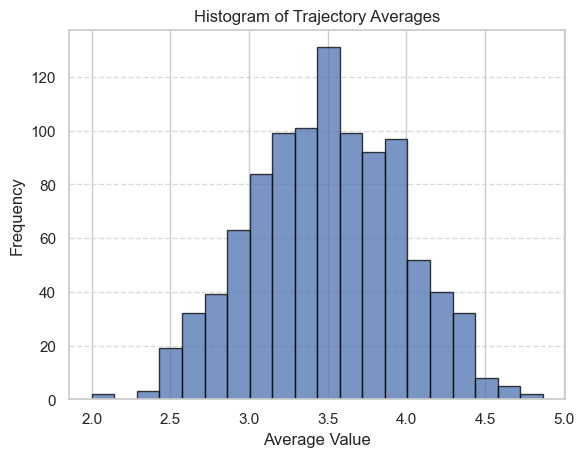

According to the Central Limit Theorem the distribution should look like a normal disribution
Empirical mean of trajectory averages: 3.4933
Empirical standard deviation of trajectory averages: 0.4716


In [63]:
# Use the extracted function
empirical_mean, empirical_std = process_and_plot_trajectories(
    T=T,
    trajectory_length=30,
    num_trajectories=1000
)

print(f"According to the Central Limit Theorem the distribution should look like a normal disribution")

print(f"Empirical mean of trajectory averages: {empirical_mean:.4f}")
print(f"Empirical standard deviation of trajectory averages: {empirical_std:.4f}")

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [64]:
print(f"We expect the avarage value to be same as the previous since we calculated it from the stationary state")

We expect the avarage value to be same as the previous since we calculated it from the stationary state


trajectories_average: 3.4959


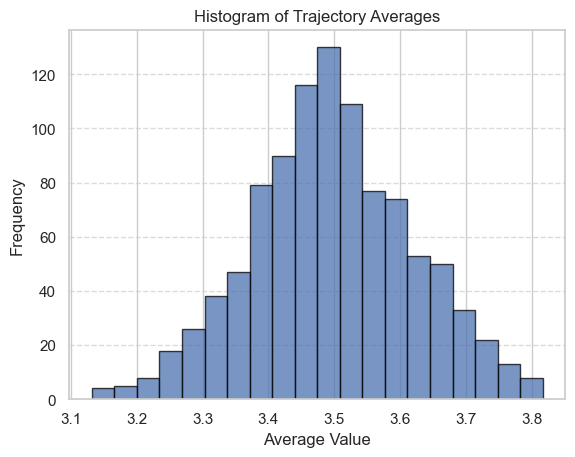

According to the Central Limit Theorem the distribution should look like a normal disribution
Empirical mean of trajectory averages: 3.4959
Empirical standard deviation of trajectory averages: 0.1227


In [65]:
# Use the extracted function
empirical_mean, empirical_std = process_and_plot_trajectories(
    T=T,
    trajectory_length=500,
    num_trajectories=1000
)

print(f"According to the Central Limit Theorem the distribution should look like a normal disribution")

print(f"Empirical mean of trajectory averages: {empirical_mean:.4f}")
print(f"Empirical standard deviation of trajectory averages: {empirical_std:.4f}")

#### 4.C
Draw normal fit curves on your two histograms.

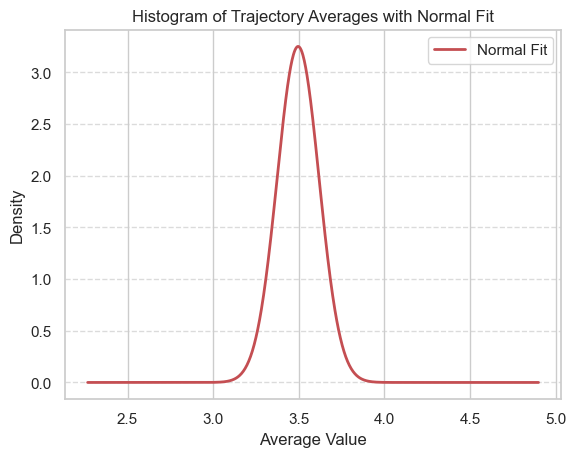

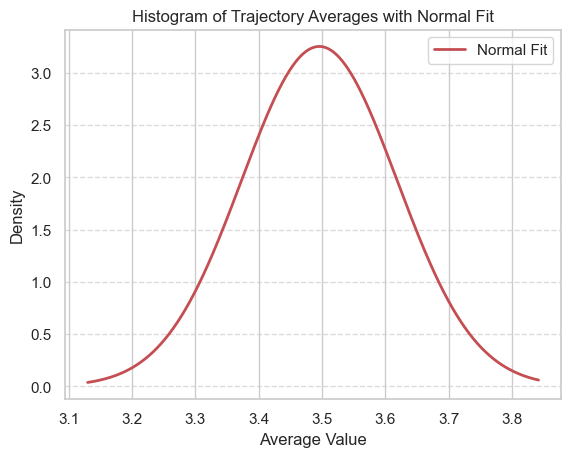

In [66]:
from scipy.stats import norm

def plot_normal_fit_curve(trajectory_averages, empirical_mean, empirical_std):

    # Generate the x values for the normal fit curve
    x = np.linspace(trajectory_averages.min(), trajectory_averages.max(), 1000)
    y = norm.pdf(x, loc=empirical_mean, scale=empirical_std)
    
    # Plot the normal fit curve
    plt.plot(x, y, 'r-', label='Normal Fit', linewidth=2)
    plt.title('Histogram of Trajectory Averages with Normal Fit')
    plt.xlabel('Average Value')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

trajectory_averages = process_trajectories(T, 30, 1000)
plot_normal_fit_curve(trajectory_averages, empirical_mean, empirical_std)

trajectory_averages = process_trajectories(T, 500, 1000)
plot_normal_fit_curve(trajectory_averages, empirical_mean, empirical_std)


#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

Cov(X_0, X_1) = -8.7500
Cov(X_0, X_2) = -11.3400
Cov(X_0, X_3) = -11.9630
Cov(X_0, X_4) = -12.1485
Cov(X_0, X_5) = -12.2119
Cov(X_0, X_6) = -12.2352
Cov(X_0, X_7) = -12.2442
Cov(X_0, X_8) = -12.2477
Cov(X_0, X_9) = -12.2491
Cov(X_0, X_10) = -12.2496


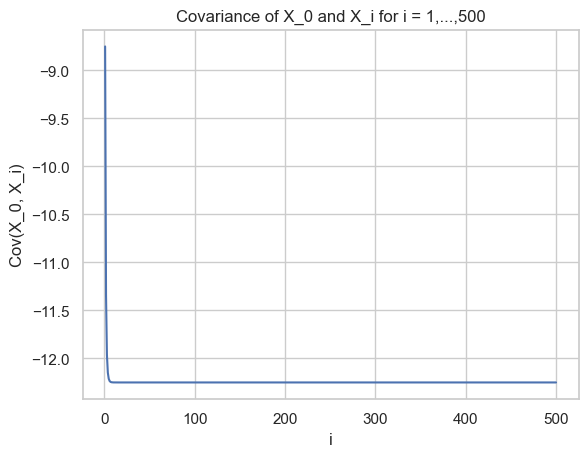

In [67]:
# Calculate the expected value of X_0
E_X0 = np.dot(states, stationary)

# Compute the covariance for each i=1,...,500
covariances = []

# Calculate E[X_0 * X_i] for each i
for i in range(1, 501):
    # Calculate E[X_0 * X_i]
    E_X0_Xi = np.dot(stationary, T ** i).dot(states)
    # Compute the covariance
    covariance = E_X0_Xi - E_X0 ** 2
    covariances.append(covariance)

# Output the first few values of the covariance
for i in range(1, 11):  # Print the first few values of covariance
    print(f"Cov(X_0, X_{i}) = {covariances[i-1]:.4f}")

plt.plot(range(1, 501), covariances, label="Cov(X_0, X_i)")
plt.xlabel("i")
plt.ylabel("Cov(X_0, X_i)")
plt.title("Covariance of X_0 and X_i for i = 1,...,500")
plt.grid(True)
plt.show()

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

1. The probability that all the samples are greater than $q$ is $0.2^n$ because each sample has a $0.2$ chance of being greater than $q$. Therefore,

$$
P(R = 0) = 0.2^n
$$

2. The number of observations less than or equal to $q$ follows a binomial distribution with parameters $n$ and $p = 0.8$. Thus,

$$
R \sim \text{Binomial}(n, 0.8)
$$

The probability mass function is:

$$
P(R = k) = \binom{n}{k} (0.8)^k (0.2)^{n-k}
$$

for $k = 0, 1, 2, ..., n$.

In [106]:
from scipy.stats import binom

def lambda_n(n, p=0.8, target_prob=0.1):
    lambda_n = int(binom.ppf(target_prob, n, p))
    return lambda_n

In [107]:
# Parameters
n = 100
q = 0.8  # 80th percentile for Unif(0,1)
num_experiments = 200

# Compute lambda(n) for n = 100
lambda_n_value = lambda_n(n)

print(lambda_n_value)

# Run 200 experiments
count_a_lambda_le_q = 0

for _ in range(num_experiments):
    # Generate 100 independent samples from Unif(0,1)
    samples = np.random.uniform(0, 1, n)
    
    # Sort the samples
    sorted_samples = np.sort(samples)
    
    # Get a_lambda(n)
    a_lambda_n = sorted_samples[lambda_n_value - 1]  # Adjust for zero-indexing
    
    # Check if a_lambda(n) <= q
    if a_lambda_n <= q:
        count_a_lambda_le_q += 1

print(f"Out of {num_experiments} experiments, a_lambda(n) <= q occurred {count_a_lambda_le_q} times.")


75
Out of 200 experiments, a_lambda(n) <= q occurred 183 times.
